<h1 style="color: white; background-color: #2C3E50; padding: 15px; border-radius: 8px; text-align: center;">
  Lio-Jotstar Merger Analysis: OTT Platform Performance & User Behavior (Jan-Nov 2024)
</h1>


<h3 style="color:orange;">Importing Necessay Libraries:</h3>


In [3]:
# Install necessary libraries
!pip install sqlalchemy mysql-connector-python
!pip install prettytable

# Establish connection to a MySQL database
from sqlalchemy import create_engine  

# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np

#For date and time
from datetime import datetime

# Statistical analysis library
from scipy.stats import chi2_contingency  # For chi-square test

# Libraries for data visualization
from prettytable import PrettyTable  # For tabular data display
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({
    'axes.facecolor': 'black',        # Background of the plot area
    'figure.facecolor': 'black',      # Background of the entire figure
    'axes.edgecolor': 'white',        # Axes border color
    'axes.labelcolor': 'white',       # Labels (x, y) color
    'xtick.color': 'white',           # X-axis tick color
    'ytick.color': 'white',           # Y-axis tick color
    'text.color': 'white',            # Default text color
    'axes.titlepad': 10,              # Space between title and plot
    'axes.titlesize': 14,             # Title font size
    'axes.titleweight': 'bold',       # Title font weight
    'grid.color': 'gray',             # Grid line color (optional)
    'grid.linestyle': '--'            # Grid line style (optional)
})


# Define color palettes for visualizations
lio_palette = "Oranges" 
jot_palette = "Blues"  


<h1 style="color: white; background-color: #34495E; padding: 12px; border-radius: 6px; text-align: center;">
  1. Connect to the Databases Using SQLAlchemy
</h1>

<h3 style="color:orange;">Databases:</h3>
<p style="color:white;">jotstar_db, liocinema_db</p>

<h3 style="color:orange;">Table Names:</h3>
<p style="color:white;">content_consumption, contents, subscribers</p>

In [5]:
# Database connection parameters
host = "127.0.0.1"
user = "root"
password = "root"
database_1 = "jotstar_db"  
database_2 = "liocinema_db"  


# Create SQLAlchemy engine for jotstar_db
jot_engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{database_1}')

# Create SQLAlchemy engine for liocinema_db
lio_engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}/{database_2}')

<h1 style="color: white; background-color: #2C3E50; padding: 12px; border-radius: 6px; text-align: center;">
  2. Loading Data into Pandas DataFrames
</h1>


In [7]:
# Load LioCinema data
lio_contents = pd.read_sql("SELECT * FROM contents", lio_engine)  # Retrieve all content details

lio_subscribers = pd.read_sql("SELECT * FROM subscribers",lio_engine) # Retrieve all Subscribers details
    
lio_consumption = pd.read_sql("SELECT * FROM content_consumption", lio_engine)  # Retrieve Subscribers content consumption data


# Load Jotstar data
jot_contents = pd.read_sql("SELECT * FROM contents", jot_engine)  # Retrieve all content details

jot_subscribers = pd.read_sql("SELECT * FROM subscribers", jot_engine) # Retrieve all Subscribers details

jot_consumption = pd.read_sql("SELECT * FROM content_consumption", jot_engine)  # Retrieve Subscribers content consumption data


<h1 style="color: white; background-color: #2C3E50; padding: 12px; border-radius: 6px; text-align: center; text-decoration: underline;">
  Database Tables
</h1>

<h2 style="color:orange;">1. Contents</h2>
<p><b>Purpose:</b> This table provides detailed information about the content available on the platform, enabling analysis of content diversity, genre popularity, and runtime patterns.</p>

<ul>
  <li><b>content_id:</b> Unique identifier for each content item on the platform (e.g., CLCMHIROM1bdbc, CLCMHIDRAfce3f).</li>
  <li><b>content_type:</b> Type of content (e.g., Movie, Series).</li>
  <li><b>language:</b> Language in which the content is available (e.g., Hindi, English).</li>
  <li><b>genre:</b> Genre of the content (e.g., Romance, Action, Drama).</li>
  <li><b>run_time:</b> Duration of the content in minutes (e.g., 120, 150).</li>
</ul>

<h2 style="color:orange;">2. Subscribers</h2>
<p><b>Purpose:</b> This table captures demographic and subscription details for users, enabling insights into subscriber acquisition, upgrades, downgrades, and inactivity patterns.</p>

<ul>
  <li><b>user_id:</b> Unique identifier for each subscriber (e.g., UIDLC1d62ccb715a, UIDLC0d6f2dad4bb).</li>
  <li><b>age_group:</b> Age group of the subscriber (e.g., 18-24, 25-34).</li>
  <li><b>city_tier:</b> City category of the subscriber (e.g., Tier 1, Tier 2, Tier 3).</li>
  <li><b>subscription_date:</b> The date when the user subscribed to LioCinema (YYYY-MM-DD).</li>
  <li><b>subscription_plan:</b> The initial subscription plan chosen by the user (e.g., Free, Basic, Premium).</li>
  <li><b>last_active_date:</b> The most recent date the user interacted with the platform. For inactive users, this column captures the last recorded date of activity, and for active users, it is NULL (YYYY-MM-DD).</li>
  <li><b>plan_change_date:</b> Date when the user’s subscription plan was last updated (YYYY-MM-DD).</li>
  <li><b>new_subscription_plan:</b> The updated subscription plan, reflecting any upgrades or downgrades (e.g., upgrade to Basic/Premium, downgrade to Free/Basic).</li>
</ul>

<h2 style="color:orange;">3. Content Consumption</h2>
<p><b>Purpose:</b> This table captures user-level content consumption data, enabling analysis of total watch time, device preferences, and engagement trends.</p>

<ul>
  <li><b>user_id:</b> Unique identifier for each subscriber (e.g., UIDLC1d62ccb715a).</li>
  <li><b>device_type:</b> Type of device used to consume content (e.g., Mobile, TV, Tablet).</li>
  <li><b>total_watch_time (mins):</b> Total time spent watching content in minutes (e.g., 2721, 3286).</li>
</ul>


<h1 style="color:white; background-color:#2C3E50; padding:12px; border-radius:8px; text-decoration: underline; text-align:center;">
  JotStar Data
</h1>

<p style="background-color:#2C3E50; color:white; padding:10px; border-radius:5px; font-size:16px; line-height:1.5;">
  This database contains detailed data on <b>content</b>, <b>subscribers</b>, and <b>content consumption</b> for the JotStar platform, 
  enabling insights into <b>content performance</b>, <b>user behavior</b>, and <b>platform trends</b>.
</p>


In [10]:
# Function to display statistics of the DataFrame

def table_stats(dataframe):
    print("Number of rows and columns: ", dataframe.shape)  # Display the shape of the DataFrame
    print("-" * 70)
    
    print("Any Duplicate values: ", sum(dataframe.duplicated()))  # Count duplicate rows
    print("-" * 70)
    
    print("Top 5 records:")  
    print(dataframe.head())  # Display the first 5 rows
    print("-" * 70)
    
    print("\nDataFrame Info:")
    print(dataframe.info())  # Display concise summary of the DataFrame
    print("-" * 70)
    
    print("\nSummary Statistics:")
    print(dataframe.describe(include='all'))  # Display summary statistics 
    print("-" * 70)


## 

<h2 style="color:orange;">1. JotStar Contents Table</h2>


In [12]:
table_stats(jot_contents)

Number of rows and columns:  (2360, 5)
----------------------------------------------------------------------
Any Duplicate values:  0
----------------------------------------------------------------------
Top 5 records:
       content_id content_type language   genre  run_time
0  CJSMBEACT2e633        Movie  Bengali  Action        90
1  CJSMBEACT34aec        Movie  Bengali  Action       135
2  CJSMBEACT83b46        Movie  Bengali  Action       120
3  CJSMBECOM12e7a        Movie  Bengali  Comedy       120
4  CJSMBECOM5431a        Movie  Bengali  Comedy       135
----------------------------------------------------------------------

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content_id    2360 non-null   object
 1   content_type  2360 non-null   object
 2   language      2360 non-null   object
 3   genre         2360 non

<ul style="color: white; background-color: #444; padding: 12px; border-radius: 8px; font-size: 14px; line-height: 1.5;">
  <li>The dataset contains no duplicate or null records.</li>
  <li>There are 2,360 unique content entries, with movies being the most common (1,180).</li>
  <li>English is the most frequently used language (800 entries), and Action is the dominant genre.</li>
</ul>


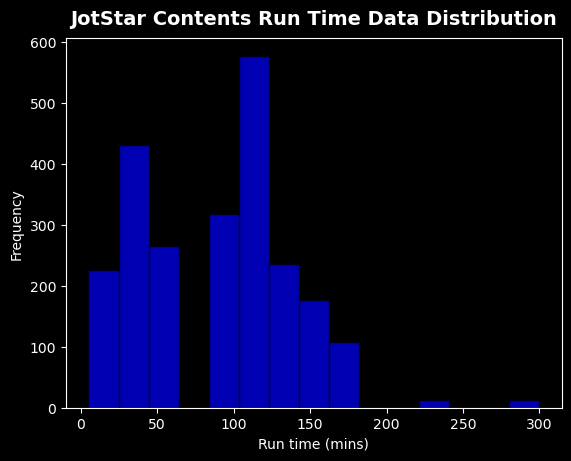

In [14]:
jot_contents['run_time'].hist(bins=15,edgecolor='black',alpha=0.7,color="blue")

plt.xlabel('Run time (mins)')
plt.ylabel('Frequency')
plt.title('JotStar Contents Run Time Data Distribution')
plt.grid(False)
plt.show()


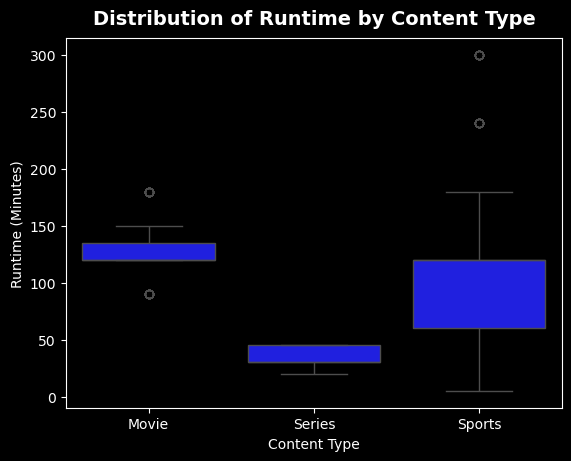

In [15]:
sns.boxplot(x="content_type", y="run_time", data=jot_contents,color="blue")

# Labels and Title
plt.xlabel("Content Type")
plt.ylabel("Runtime (Minutes)")
plt.title("Distribution of Runtime by Content Type")

# Show plot
plt.show()

#
<h2 style="color:orange;">2. JotStar Subscribers Table</h2>


In [17]:
table_stats(jot_subscribers)

Number of rows and columns:  (44620, 8)
----------------------------------------------------------------------
Any Duplicate values:  0
----------------------------------------------------------------------
Top 5 records:
            user_id age_group city_tier subscription_date subscription_plan  \
0  UIDJS0000751588f     18-24    Tier 1        2024-06-10           Premium   
1  UIDJS000093eeb86     18-24    Tier 1        2024-11-09              Free   
2  UIDJS00010d7fa1e     25-34    Tier 1        2024-08-08              Free   
3  UIDJS00013411a85     35-44    Tier 2        2024-05-31               VIP   
4  UIDJS0003a3f54cf     35-44    Tier 1        2024-09-20           Premium   

  last_active_date plan_change_date new_subscription_plan  
0             None             None                  None  
1             None             None                  None  
2             None             None                  None  
3             None             None                  None  
4  

<ul style="color: white; background-color: #444; padding: 12px; border-radius: 8px; font-size: 14px; line-height: 1.5;">
  <li>The dataset contains no duplicate.</li>
  <li>Date columns are in object format and should be converted to the appropriate date format.</li>
  <li>Some columns contain null values and require evaluation.</li>
  <li>There are 44.6K subscriber entries, with the 25-34 age group being the largest (20K).</li>
  <li>Most users are from Tier-1 cities, with higher subscriptions to VIP and Premium plans.</li>
</ul>


In [19]:
##Converting date columns to right format

jot_subscribers['subscription_date'] = pd.to_datetime(jot_subscribers['subscription_date'])
jot_subscribers['last_active_date'] = pd.to_datetime(jot_subscribers['last_active_date'])
jot_subscribers['plan_change_date'] = pd.to_datetime(jot_subscribers['plan_change_date'])

In [20]:
jot_subscribers.describe()

,subscription_date,last_active_date,plan_change_date
count,44620,6652,7090
mean,2024-06-18 07:26:00.376512768,2024-09-07 08:07:04.293445888,2024-08-10 08:20:38.928067840
min,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-02-01 00:00:00
25%,2024-03-26 00:00:00,2024-07-06 00:00:00,2024-05-25 06:00:00
50%,2024-06-19 12:00:00,2024-09-27 00:00:00,2024-08-17 00:00:00
75%,2024-09-11 00:00:00,2024-11-18 00:00:00,2024-11-04 00:00:00
max,2024-11-30 00:00:00,2024-12-29 00:00:00,2024-12-31 00:00:00


##

<h2 style="color:orange;">3. JotStar Content Consumption Table</h2>


In [22]:
table_stats(jot_consumption)

Number of rows and columns:  (133860, 3)
----------------------------------------------------------------------
Any Duplicate values:  0
----------------------------------------------------------------------
Top 5 records:
            user_id device_type  total_watch_time_mins
0  UIDJS877cc0e02c9      Mobile                  14613
1  UIDJS06384e7ff06      Mobile                  13271
2  UIDJSc3997b7beb7      Mobile                   4644
3  UIDJS66726ce2325      Mobile                   5734
4  UIDJS040119b6107      Mobile                   2939
----------------------------------------------------------------------

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133860 entries, 0 to 133859
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   user_id                133860 non-null  object
 1   device_type            133860 non-null  object
 2   total_watch_time_mins  133860 non-nu

In [23]:
jot_consumption[jot_consumption['user_id'] == 'UIDJS44e851ffbd2']

,user_id,device_type,total_watch_time_mins
44619,UIDJS44e851ffbd2,Mobile,21799
89239,UIDJS44e851ffbd2,TV,13906
133859,UIDJS44e851ffbd2,Laptop,11574


In [24]:
jot_consumption['user_id'].value_counts().value_counts()

count
3    44620
Name: count, dtype: int64

<Axes: xlabel='device_type', ylabel='total_watch_time_mins'>

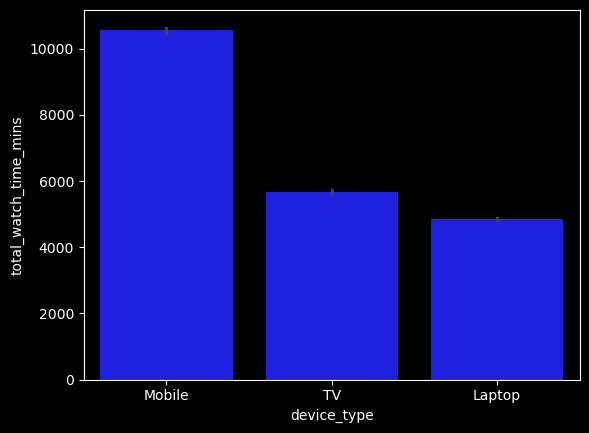

In [25]:
sns.barplot(x="device_type", 
         y="total_watch_time_mins", 
         data=jot_consumption.sort_values(by="total_watch_time_mins", ascending=False), 
         color="blue")


<ul style="color: white; background-color: #444; padding: 10px; border-radius: 5px;">
  <li>The content consumption table (133K records) contains three times the number of users (44K), suggesting frequent device switching (mobile, laptop, TV) and a strong preference for cross-platform accessibility.</li>
  <li>Content consumption trends vary based on device type.</li>
</ul>


<h1 style="color:white; background-color:#2C3E50; padding:12px; border-radius:8px; text-decoration: underline; text-align:center;">
  LioCinema Data
</h1>

<p style="background-color:#2C3E50; color:white; padding:10px; border-radius:5px; font-size:16px; line-height:1.5;">
  This database contains detailed data on <b>content</b>, <b>subscribers</b>, and <b>content consumption</b> for the liocinema platform, 
  enabling insights into <b>content performance</b>, <b>user behavior</b>, and <b>platform trends</b>.
</p>


#
<h2 style="color:orange;">1. LioCinema Contents Table</h2>


In [29]:
table_stats(lio_contents)

Number of rows and columns:  (1250, 5)
----------------------------------------------------------------------
Any Duplicate values:  0
----------------------------------------------------------------------
Top 5 records:
       content_id content_type language   genre  run_time
0  CLCMENACT6b77e        Movie  English  Action       120
1  CLCMENACTb7ceb        Movie  English  Action       135
2  CLCMENCOM1563a        Movie  English  Comedy       135
3  CLCMENCOM16d2c        Movie  English  Comedy       135
4  CLCMENCOMa0548        Movie  English  Comedy       135
----------------------------------------------------------------------

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content_id    1250 non-null   object
 1   content_type  1250 non-null   object
 2   language      1250 non-null   object
 3   genre         1250 non

<ul style="color: white; background-color: #444; padding: 12px; border-radius: 8px; font-size: 14px; line-height: 1.5;">
  <li>The dataset contains no duplicate or null records.</li>
  <li>There are 1,250 unique content entries, with movies being the most common (900).</li>
  <li>Hindi is the most frequently used language (424 entries), and Drama is the dominant genre.</li>
</ul>


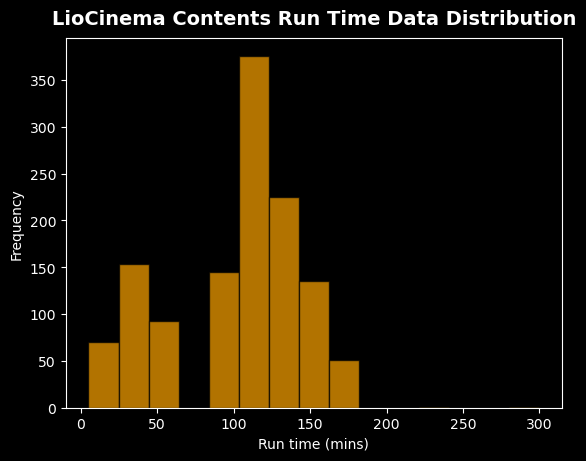

In [31]:
lio_contents['run_time'].hist(bins=15,edgecolor='black',alpha=0.7,color="orange")

plt.xlabel('Run time (mins)')
plt.ylabel('Frequency')
plt.title('LioCinema Contents Run Time Data Distribution')
plt.grid(False)
plt.show()


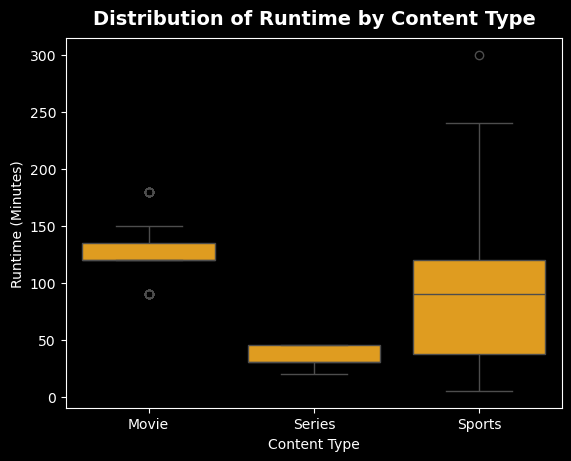

In [32]:
sns.boxplot(x="content_type", y="run_time", data=lio_contents,color="orange")

# Labels and Title
plt.xlabel("Content Type")
plt.ylabel("Runtime (Minutes)")
plt.title("Distribution of Runtime by Content Type")

# Show plot
plt.show()

#
<h2 style="color:orange;">2. LioCinema Subscribers Table</h2>


In [34]:
table_stats(lio_subscribers)

Number of rows and columns:  (183446, 8)
----------------------------------------------------------------------
Any Duplicate values:  0
----------------------------------------------------------------------
Top 5 records:
            user_id age_group city_tier subscription_date subscription_plan  \
0  UIDLC00000bea68a     25-34    Tier 3        2024-10-24              Free   
1  UIDLC00009202848     18-24    Tier 1        2024-09-18             Basic   
2  UIDLC0001086afc3     35-44    Tier 2        2024-03-23           Premium   
3  UIDLC000186abd93     18-24    Tier 3        2024-09-07              Free   
4  UIDLC0002189b09f     18-24    Tier 2        2024-10-07           Premium   

  last_active_date plan_change_date new_subscription_plan  
0             None             None                  None  
1             None             None                  None  
2             None       2024-04-23                  Free  
3       2024-10-23             None                  None  
4 

<ul style="color: white; background-color: #444; padding: 12px; border-radius: 8px; font-size: 14px; line-height: 1.5;">
  <li>The dataset contains no duplicate.</li>
  <li>Date columns are in object format and should be converted to the appropriate date format.</li>
  <li>Some columns contain null values and require evaluation.</li>
  <li>There are 183K subscriber entries, with the 18-24 age group being the largest (78k).</li>
  <li>Most users are from Tier-3 cities, with dominant Free plan users.</li>
</ul>


In [36]:
lio_subscribers['subscription_date'] = pd.to_datetime(lio_subscribers['subscription_date'])
lio_subscribers['last_active_date'] = pd.to_datetime(lio_subscribers['last_active_date'])
lio_subscribers['plan_change_date'] = pd.to_datetime(lio_subscribers['plan_change_date'])

In [37]:
lio_subscribers.describe()

,subscription_date,last_active_date,plan_change_date
count,183446,82305,25014
mean,2024-08-06 00:47:05.899719936,2024-09-09 20:01:26.604701696,2024-09-06 10:54:15.456943616
min,2024-01-01 00:00:00,2024-02-01 00:00:00,2024-02-01 00:00:00
25%,2024-06-04 00:00:00,2024-07-17 00:00:00,2024-07-08 00:00:00
50%,2024-08-29 00:00:00,2024-10-04 00:00:00,2024-09-22 00:00:00
75%,2024-10-22 00:00:00,2024-11-11 00:00:00,2024-11-18 00:00:00
max,2024-11-30 00:00:00,2024-12-29 00:00:00,2024-12-31 00:00:00


#
<h2 style="color:orange;">3. LioCinema Content Consumption Table</h2>


In [39]:
table_stats(lio_consumption)

Number of rows and columns:  (430752, 3)
----------------------------------------------------------------------
Any Duplicate values:  0
----------------------------------------------------------------------
Top 5 records:
            user_id device_type  total_watch_time_mins
0  UIDLC459c98ee486      Mobile                    502
1  UIDLCe4b2fd90790      Mobile                   2098
2  UIDLCbc8f0a05367      Mobile                    557
3  UIDLC9fc67130445      Mobile                   1720
4  UIDLC7026c3e0374      Mobile                    908
----------------------------------------------------------------------

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430752 entries, 0 to 430751
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   user_id                430752 non-null  object
 1   device_type            430752 non-null  object
 2   total_watch_time_mins  430752 non-nu

In [40]:
lio_consumption[lio_consumption['user_id'] == 'UIDLCbc8f0a05367']

,user_id,device_type,total_watch_time_mins
2,UIDLCbc8f0a05367,Mobile,557
183447,UIDLCbc8f0a05367,TV,79
307100,UIDLCbc8f0a05367,Laptop,80


In [41]:
lio_consumption[lio_consumption['user_id'] == 'UIDLC459c98ee486']

,user_id,device_type,total_watch_time_mins
0,UIDLC459c98ee486,Mobile,502


In [42]:
lio_consumption['user_id'].value_counts().value_counts()

count
3    123653
1     59793
Name: count, dtype: int64

<ul style="color: white; background-color: #444; padding: 10px; border-radius: 5px;">
  <li>The content consumption table (430k records) contains 2.3x times the number of users (183k), suggesting frequent device switching (mobile, laptop, TV) and a strong preference for cross-platform accessibility.</li>
  <li>Content consumption trends vary based on device type.</li>
</ul>


<Axes: xlabel='device_type', ylabel='total_watch_time_mins'>

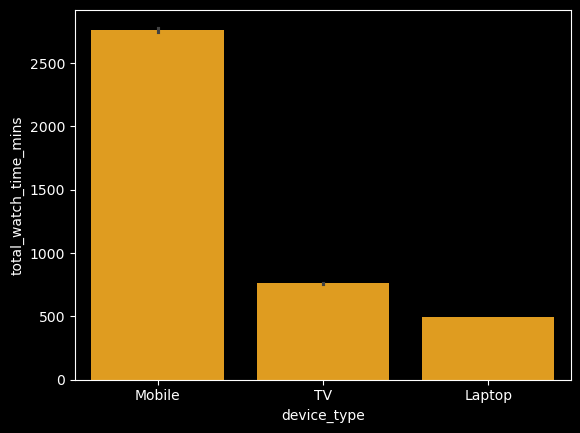

In [44]:
sns.barplot(x="device_type", 
         y="total_watch_time_mins", 
         data=lio_consumption.sort_values(by="total_watch_time_mins", ascending=False), 
         color="orange")


# 
<h1 style="color:white; background-color:#2C3E50; padding:12px; border-radius:8px; text-decoration: underline; text-align:center;">
Data Cleaning</h1>

To ensure data alignment with the requested January to November 2024 analysis, December plan_change_date and last_activity_date values were nullified. This methodological adjustment presumes that users active or changing plans in December maintained their subscription and activity throughout November, thereby ensuring all analytical metrics reflect the specified timeframe

<ul style="color: white; background-color: #444; padding: 12px; border-radius: 8px; font-size: 14px; line-height: 1.5;">
    <li>Our analysis focuses on user activity from January to November 2024, with the latest recorded active date being December 29, 2024. This confirms that these users were active in November. The same logic applies to the plan change date.</li>
    <li><strong>Logic:</strong></li>
    <ul>
        <li>If <code>MONTH(last_active_date) > 11</code>, then <code>last_active_date</code> is set to <code>NULL</code>.</li>
        <li>If <code>MONTH(plan_change_date) > 11</code>, then both <code>plan_change_date</code> and <code>new_subscription_plan</code> are set to <code>NULL</code>.</li>
    </ul>
</ul>


In [ ]:
# Apply logic: If month > 12, set values to NULL (NaT for datetime, None for strings)
jot_subscribers.loc[jot_subscribers['last_active_date'].dt.month > 11, 'last_active_date'] = pd.NaT
jot_subscribers.loc[jot_subscribers['plan_change_date'].dt.month > 11, ['new_subscription_plan', 'plan_change_date']] = [None, pd.NaT]

In [46]:
# Apply logic: If month > 11, set values to NULL (NaT for datetime, None for strings)
lio_subscribers.loc[lio_subscribers['last_active_date'].dt.month > 11, 'last_active_date'] = pd.NaT
lio_subscribers.loc[lio_subscribers['plan_change_date'].dt.month > 11, ['new_subscription_plan', 'plan_change_date']] = [None,pd.NaT]

# 
<h1 style="color:white; background-color:#2C3E50; padding:12px; border-radius:8px; text-decoration: underline; text-align:center;">
  Primary Analysis
</h1>


#

<h2 style="color:orange; background-color:#2C3E50; padding:10px; border-radius:8px; text-decoration: underline;">
  1. Content Library Comparison
</h2>

<p style="background-color:#2C3E50; color:white; padding:10px; border-radius:5px; font-size:16px; line-height:1.5;">
  A detailed comparison of content types across both platforms.
</p>


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_side_by_side(df1, df2, plot_type, x=None, y=None, hue=None,
                     palette1=None, palette2=None, title1=None, title2=None,
                     figsize=(14, 6), legend=False):
    """
    Function to generate side-by-side visualizations for two DataFrames.
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    for df, palette, title, ax in zip([df1, df2], [palette1, palette2], [title1, title2], axes):
        if plot_type in ["count", "bar"]:
            if plot_type == "count":
                data = df[y].value_counts().sort_values(ascending=False)
                sns.barplot(x=data.values, y=data.index, hue=data.index, palette=palette, ax=ax, legend=False)
            else:
                df_sorted = df.sort_values(by=y, ascending=False)
                sns.barplot(x=df_sorted[x], y=df_sorted[y], hue=hue, palette=palette, ax=ax)

            ax.set_xlabel("Count" if plot_type == "count" else x)
            ax.set_ylabel(y)

            for p in ax.patches:
                ax.annotate(f'{int(p.get_width())}',
                            (p.get_width(), p.get_y() + p.get_height() / 2),
                            ha='left', va='center', fontsize=10, color='white') # changed to white

        elif plot_type == "pie":
            counts = df[y].value_counts()
            ax.pie(counts, labels=counts.index, autopct='%1.1f%%',
                   colors=sns.color_palette(palette, len(counts)), startangle=90)
            ax.set_ylabel('')

        elif plot_type == "line":
            sns.lineplot(data=df, x=x, y=y, hue=hue, palette=palette, ax=ax, marker="o")
            ax.set_xlabel(x)
            ax.set_ylabel(y)
            ax.grid(True)
            if legend:
                ax.legend(title=hue)

            # Add data labels for line plot
            for line in ax.lines:
                for x_val, y_val in zip(line.get_xdata(), line.get_ydata()):
                    ax.annotate(f'{y_val:.2f}',
                                (x_val, y_val),
                                textcoords="offset points",
                                xytext=(0, 5),
                                ha='center', fontsize=8, color='white') # changed to white

        else:
            raise ValueError("Invalid plot type! Choose from 'count', 'bar', 'pie', or 'line'.")

        ax.set_title(title)

    plt.tight_layout()
    plt.show()

<h3 style="color:orange;">1.1 Total Number of Content Items on Each Platform</h3>


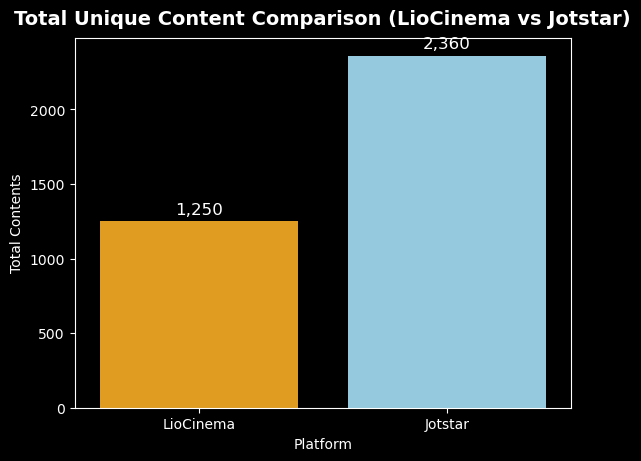

In [52]:
lio_unique_contents = lio_contents['content_id'].nunique()
jotstar_unique_contents = jot_contents['content_id'].nunique()

# Data for plotting
data = pd.DataFrame({
    'Platform': ['LioCinema', 'Jotstar'],
    'Total Contents': [lio_unique_contents, jotstar_unique_contents] 
})

sns.barplot(x='Platform', y='Total Contents', hue='Platform', data=data, palette={'LioCinema': '#FFA500', 'Jotstar': '#87CEEB'}, legend=False)

# Labels and Title
plt.xlabel("Platform")
plt.ylabel("Total Contents") 
plt.title("Total Unique Content Comparison (LioCinema vs Jotstar)") 

# Display values on bars
for i, v in enumerate(data['Total Contents']):
    plt.text(i, v + (max(data['Total Contents'])*0.02), f"{v:,}", ha='center', fontsize=12) 

plt.show()

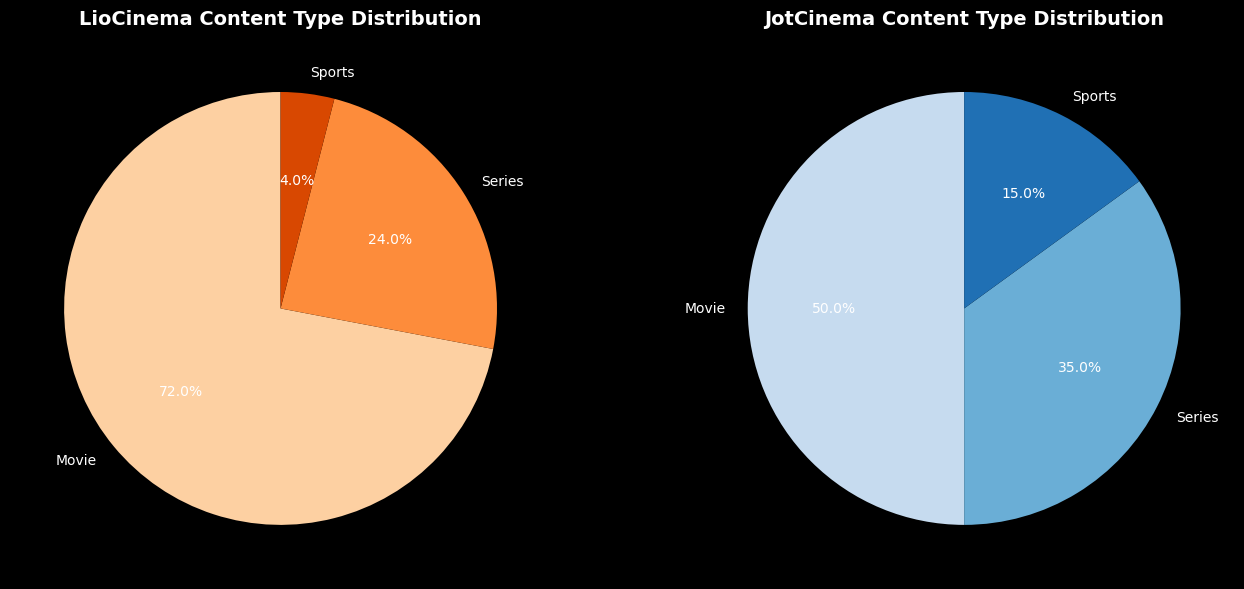

In [53]:
# visual to compare the content distrribution of platforms
plot_side_by_side(
    df1=lio_contents, df2=jot_contents, 
    plot_type="pie", y="content_type", 
    palette1=lio_palette, palette2=jot_palette, 
    title1="LioCinema Content Type Distribution", 
    title2="JotCinema Content Type Distribution"
)


<ul style="color:white; background-color:#444; padding:10px; border-radius:5px;">
  <li><b>LioCinema</b> primarily focuses on <b>movies</b>, which make up <b>72%</b> of its content library, followed by <b>series (24%)</b>.</li>
  <li><b>JotStar</b> has a more diverse content mix, with <b>50%</b> movies, <b>35%</b> series, and <b>15%</b> sports content.</li>
 <li><b>JotStar</b> offers nearly 4x more sports content than <b>LioCinema</b> (15% vs 4%).
</ul>

#
<h3 style="color:orange;">1.2 Distribution of content by language</h3>


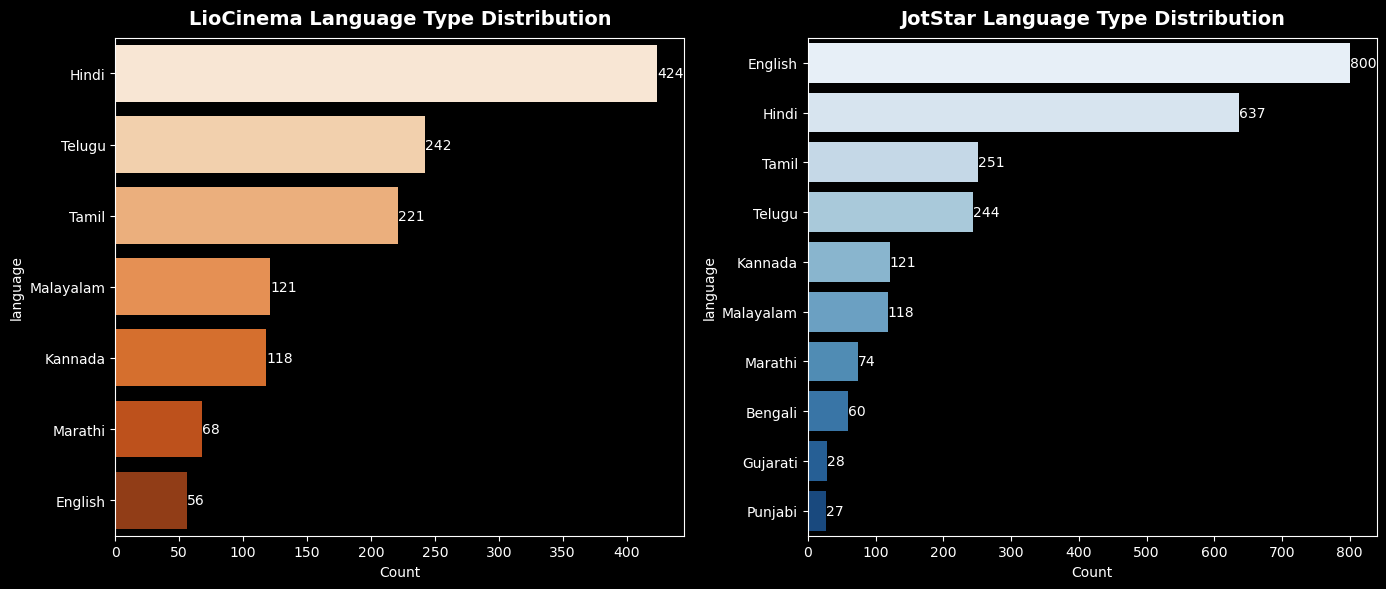

In [56]:
plot_side_by_side(
    df1=lio_contents, df2=jot_contents, 
    plot_type="count", y="language", hue="language",
    palette1=lio_palette, palette2=jot_palette, 
    title1="LioCinema Language Type Distribution", 
    title2="JotStar Language Type Distribution"
)


<ul style="color:white; background-color:#444; padding:10px; border-radius:5px;">
  <li><b>LioCinema</b> has a strong focus on <b>regional language content</b>, with <b>Hindi</b> leading, followed by <b>Telugu</b>. The platform supports content in <b>7 languages</b>, with Hindi alone making up <b>40%</b> of the total catalog.</li>
  <li><b>JotStar</b> offers content in a wider range of <b>regional languages</b> compared to LioCinema. <b>English</b> is the dominant language, accounting for <b>35%</b> of the total content, followed by <b>Hindi at 30%</b>. The platform supports content in <b>10 languages</b>.</li>
  <li>Comparing total content volume, <b>JotStar</b> has a significantly larger library with <b>2,360</b> content items, nearly <b>53%</b> more than <b>LioCinema</b>, which has <b>1,250</b> content items.</li>
    <li>JotCinema leads in English (800) and Hindi (637) content, showing a mainstream market focus. <li>
</ul>


##
<h3 style="color:orange;">1.3 Distribution of content by language and content type</h3>


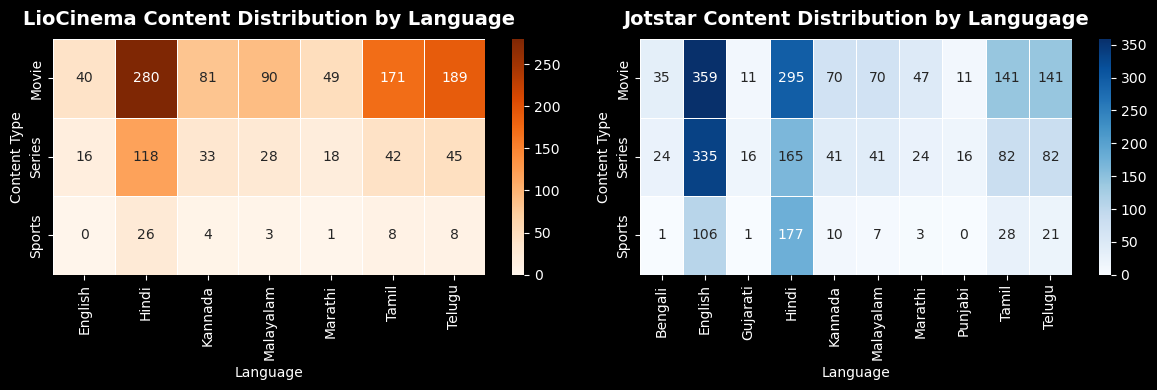

In [59]:

# Pivot the data to create matrices for heatmaps
lio_heatmap = lio_contents.pivot_table(index="content_type", columns="language", values="content_id", aggfunc="count", fill_value=0)
jot_heatmap = jot_contents.pivot_table(index="content_type", columns="language", values="content_id", aggfunc="count", fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.heatmap(lio_heatmap, annot=True, cmap="Oranges", fmt="d", linewidths=0.5, ax=axes[0])
axes[0].set_title("LioCinema Content Distribution by Language")
axes[0].set_xlabel("Language")
axes[0].set_ylabel("Content Type")

# Jotstar Heatmap
sns.heatmap(jot_heatmap, annot=True, cmap="Blues", fmt="d", linewidths=0.5, ax=axes[1])
axes[1].set_title("Jotstar Content Distribution by Langugage")
axes[1].set_xlabel("Language")
axes[1].set_ylabel("Content Type")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


<ul style="color:white; background-color:#444; padding:10px; border-radius:5px;">
  <li><b>LioCinema</b> primarily features movies with a focus on regional language content.</li>
  <li>In contrast, <b>Jotstar </b>provides a more diverse range of content, encompassing movies, series, and sports, across a wider spectrum of languages, thereby attracting a larger user base.</li>
</ul>

# Key Comparisons

## Content Focus:
- **LioCinema**: Movie-centric, with regional language emphasis.  
- **Jotstar**: More balanced across movies, series, and sports, with a wider language reach.  

## Language Targeting:
- **LioCinema**: Strong in Hindi, English, and South Indian languages.  
- **Jotstar**: Broader language coverage, including Bengali, Gujarati, and Punjabi.  

## Content Diversity:
- **LioCinema**: Less diverse, primarily movies.  
- **Jotstar**: More diverse, with significant series and sports offerings.  

## Regional vs. National Reach:
- **LioCinema**: Stronger regional presence with South Indian languages.  
- **Jotstar**: Stronger national presence with a wider variety of languages.  


#

<h2 style="color:orange; background-color:#2C3E50; padding:10px; border-radius:8px; text-decoration: underline;">
  2. Total Users & Growth Trends
</h2>

<p style="font-size: 16px; color: white; background-color:#34495E; padding:12px; border-radius:8px; line-height:1.5;">
  This section analyzes the total user base for LioCinema and JotStar, tracking growth trends over time. 
</p>

<h3 style="color:orange;">2.1 Total number of subscribers in each platform.</h3>


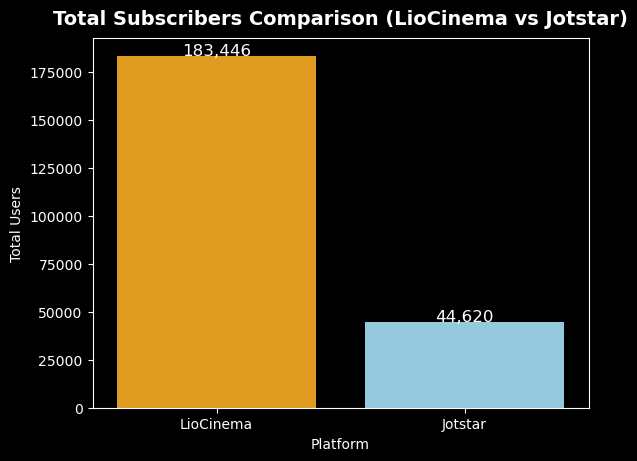

In [65]:
# Data for plotting
data = pd.DataFrame({
    'Platform': ['LioCinema', 'Jotstar'],
    'Total Users': [lio_subscribers['user_id'].nunique(), jot_subscribers['user_id'].nunique()]
})

sns.barplot(x='Platform', y='Total Users', hue='Platform', data=data, palette={'LioCinema': '#FFA500', 'Jotstar': '#87CEEB'}, legend=False)

# Labels and Title
plt.xlabel("Platform")
plt.ylabel("Total Users")
plt.title("Total Subscribers Comparison (LioCinema vs Jotstar)")

# Display values on bars
for i, v in enumerate(data['Total Users']):
    plt.text(i, v + 500, f"{v:,}", ha='center', fontsize=12)

plt.show()


<ul style="color:white; background-color:#444; padding:10px; border-radius:5px;">
  <li><b>LioCinema</b> has 183k subscribers, significantly surpassing <b>Jotstar</b>, which has 44k subscribers.</li>
  <li>This means <b>LioCinema</b> has 139k more subscribers, which is approximately ~300% more than <b>Jotstar</b>.</li>
</ul>


#
<h3 style="color:orange;">2.2 Monthly growth rates of the subscribers</h3>


In [68]:
# Function to process both dataframes
def prepare_data(df):
    """
    Function to calculate cumulative sum of the users and the growth trend

    Parameters:
    - df : dataframe
    
    Returns : dataframe with columns : Month_name, users count by month, cumulative sum and growth trend
    """
    df_grouped = df.groupby(df['subscription_date'].dt.strftime('%b')).agg({'user_id': 'count'})
    df_grouped.rename(columns={'user_id': 'user_count'}, inplace=True)
    
    month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    df_grouped = df_grouped.reindex(month_order).dropna()
    df_grouped['user_growth_per_month'] = df_grouped['user_count'].pct_change()*100
    
    df_grouped['cumulative_users'] = df_grouped['user_count'].cumsum()
    
    return df_grouped

# Process both dataframes
lio_df = prepare_data(lio_subscribers)
jotstar_df = prepare_data(jot_subscribers)

lio_df.reset_index(inplace=True)
jotstar_df.reset_index(inplace=True)

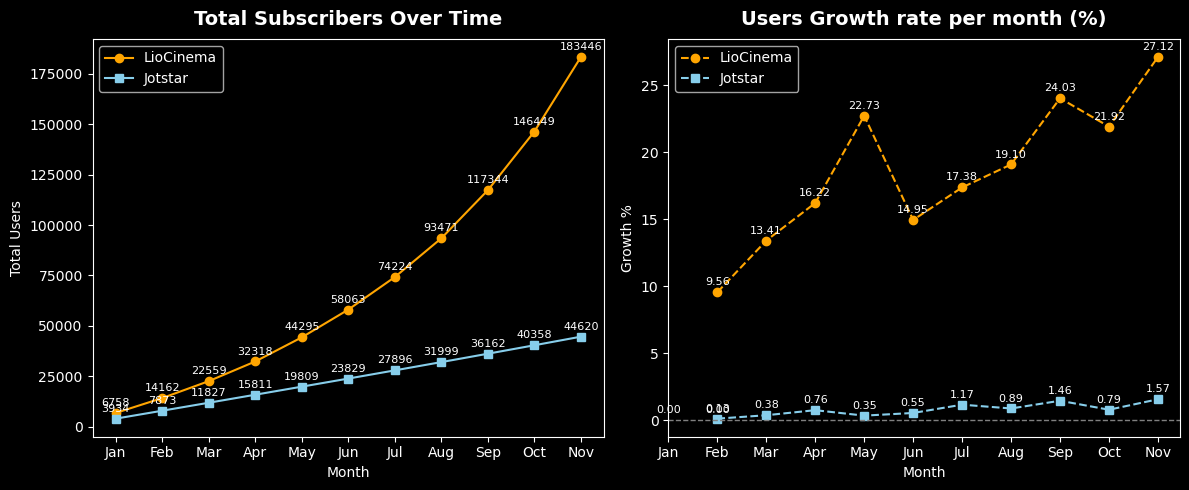

In [69]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot Cumulative User Growth
axes[0].plot(lio_df['subscription_date'].index, lio_df['cumulative_users'], marker='o', linestyle='-', color="#FFA500", label="LioCinema")
axes[0].plot(jotstar_df['subscription_date'], jotstar_df['cumulative_users'], marker='s', linestyle='-', color="#87CEEB", label="Jotstar")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Total Users")
axes[0].set_title("Total Subscribers Over Time")
axes[0].set_xticks(lio_df.index)
axes[0].legend()

# Add data labels for Cumulative User Growth
for line in axes[0].lines:
    for x_val, y_val in zip(line.get_xdata(), line.get_ydata()):
        axes[0].annotate(f'{y_val:.0f}',  # Format as integer
                            (x_val, y_val),
                            textcoords="offset points",
                            xytext=(0, 5),
                            ha='center', fontsize=8, color='white')

# Plot Growth Trend
axes[1].plot(lio_df['subscription_date'], lio_df['user_growth_per_month'], marker='o', linestyle='--', color="#FFA500", label="LioCinema")
axes[1].plot(jotstar_df['subscription_date'], jotstar_df['user_growth_per_month'], marker='s', linestyle='--', color="#87CEEB", label="Jotstar")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Growth %")
axes[1].set_title("Users Growth rate per month (%)")
axes[1].axhline(0, color="gray", linestyle="--", linewidth=1)  
axes[1].set_xticks(lio_df.index)
axes[1].legend()

# Add data labels for Growth Trend
for line in axes[1].lines:
    for x_val, y_val in zip(line.get_xdata(), line.get_ydata()):
        axes[1].annotate(f'{y_val:.2f}',  
                            (x_val, y_val),
                            textcoords="offset points",
                            xytext=(0, 5),
                            ha='center', fontsize=8, color='white')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

<ul style="color:white; background-color:#444; padding:10px; border-radius:5px;">
  <li><b>LioCinema</b> experienced strong growth, increasing from <b>9.5% (Jan)</b> to <b>27% (Nov)</b>, with peaks in <b>May (22%)</b>, <b>Sep (24%)</b>, and <b>Nov (27%)</b>. Growth remained consistently above <b>13%</b> throughout the year.</li>
  <li><b>Jotstar</b> showed steady but low growth, fluctuating between <b>0.5%-1.5%</b>, never exceeding <b>2%</b>.</li>
  <li><b>LioCinema</b> experienced <b>exponential growth</b>, rising from <b>6.7k (Jan)</b> to <b>183.5k (Nov)</b>, marking a staggering <b>2214%</b> increase.</li>
  <li><b>Jotstar</b> followed a <b>linear growth</b> pattern, expanding from <b>3.9k (Jan)</b> to <b>44.6k (Nov)</b>, reflecting a <b>1034%</b> increase.</li>
  <li>The growth gap widened significantly in <b>Q4</b>, favoring <b>LioCinema</b>.</li>
</ul>
 

# Key Comparisons

## Total Subscribers:
- **LioCinema (183.5k users)** outperformed **Jotstar (44.6k users)** by **138.8K users**, capturing **80.4%** of the total **228k users**.  
- LioCinema’s user base is **4.11x larger**, showing clear market dominance.  
- **Jotstar holds only 19.6%** of the user share, highlighting a significant competitive gap. 

## Subscribers Growth:
- **LioCinema**: Rapid, exponential growth in subscribers. 
- **Jotstar**: Steady, consistent increase in users. 



#

<h2 style="color:orange; background-color:#2C3E50; padding:10px; border-radius:8px; text-decoration: underline;">
  3. User Demographics
</h2>

<p style="font-size: 16px; color: white; background-color:#34495E; padding:12px; border-radius:8px; line-height:1.5;">
  This section explores the demographic distribution of users on LioCinema and JotStar, analyzing key factors such as age, gender, location, and viewing preferences to understand audience segmentation.
</p>


## 

<h3 style="color:orange;">3.1 Subscribers Distribution by Age Group</h3>


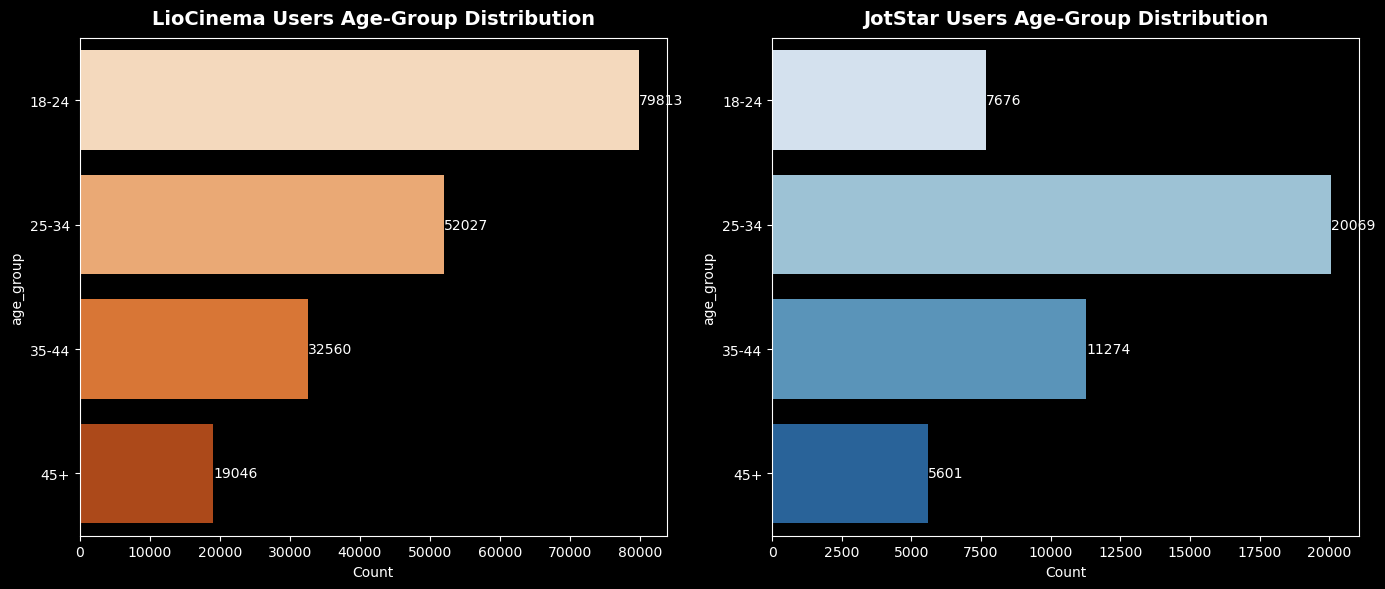

In [75]:
# Define the categorical order
age_order = ['18-24', '25-34', '35-44', '45+']

# Convert to categorical type 
lio_subscribers['age_group'] = pd.Categorical(lio_subscribers['age_group'], categories=age_order, ordered=True)
jot_subscribers['age_group'] = pd.Categorical(jot_subscribers['age_group'], categories=age_order, ordered=True)


# Plot side-by-side
plot_side_by_side(
    df1=lio_subscribers, 
    df2=jot_subscribers, 
    plot_type="count", 
    y="age_group", 
    palette1=lio_palette, 
    palette2=jot_palette, 
    title1="LioCinema Users Age-Group Distribution", 
    title2="JotStar Users Age-Group Distribution"
)


<ul style="color:white; background-color:#444; padding:10px; border-radius:5px;">
  <li>LioCinema has a <b>young</b> user base, with <b>43%</b> of its users in the <b>18-24</b> group (80k) out of 183k).</li>
  <li>JotStar’s largest audience is <b>young adults (25-34)</b>, making up <b>45%</b> (20k out of 44k).</li>
  <li><b>Older users (45+)</b> are the smallest group for both platforms, but LioCinema still has <b>over 3.4x times more</b> in this segment than JotStar (19k vs 5.6k).</li>
  <li>The <b>young adult group (25-34)</b> forms a strong base for both platforms—<b>28%(20k)</b> of LioCinema’s users and <b>45%(52k)</b> of JotStar’s.</li>
</ul>


## 



<h3 style="color:orange;">3.2 Subscribers Distribution by City</h3>


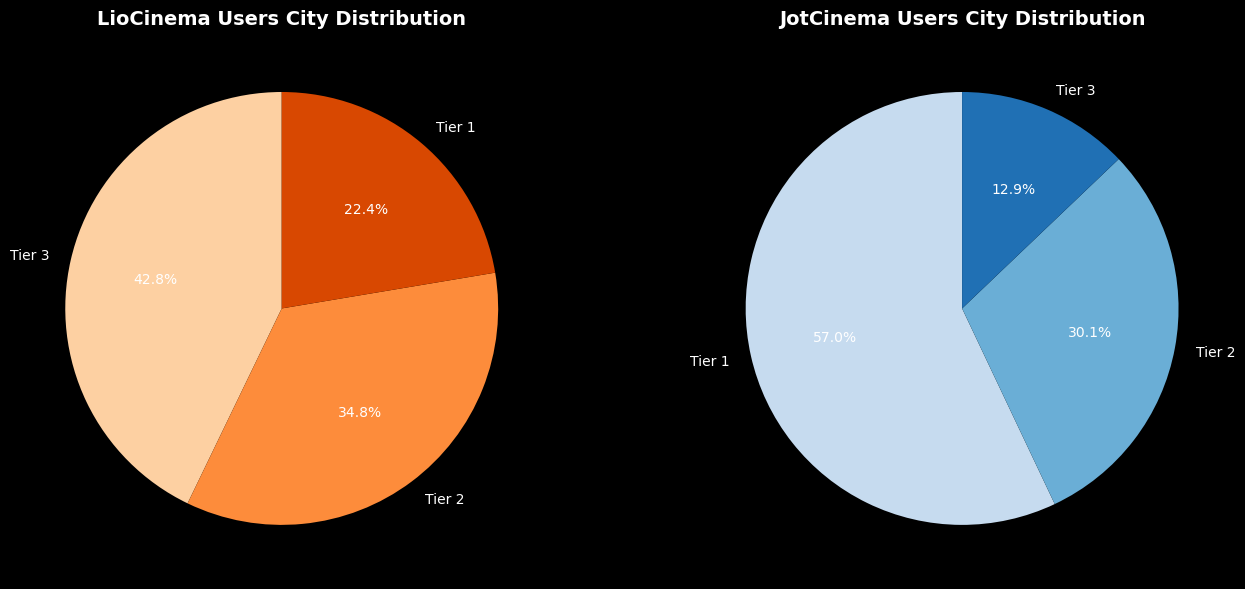

In [78]:
plot_side_by_side(
    df1=lio_subscribers, df2=jot_subscribers, 
    plot_type="pie", y="city_tier", 
    palette1=lio_palette, palette2=jot_palette, 
    title1="LioCinema Users City Distribution", 
    title2="JotCinema Users City Distribution"
)


<ul style="color:white; background-color:#444; padding:10px; border-radius:5px;">
  <li><b>LioCinema</b> has a strong presence in <b>Tier 3 cities</b>, with <b>43%</b> of its users from these regions.</li>
  <li><b>JotCinema</b>, on the other hand, has a high <b>Tier 1</b> user base (<b>57%</b>), making it more popular in metro cities.</li>
  <li><b>Tier 2 cities</b> contribute significantly to both platforms (<b>35%</b> for LioCinema, <b>30%</b> for JotCinema), indicating a balanced urban reach.</li>
  <li><b>JotCinema</b> has a lower <b>Tier 3</b> presence (<b>13%</b>), suggesting its content may be more aligned with urban audiences compared to LioCinema.</li>
</ul>


## 

<h3 style="color:orange;">3.3 Subscribers Distribution by Subscription plan</h3>


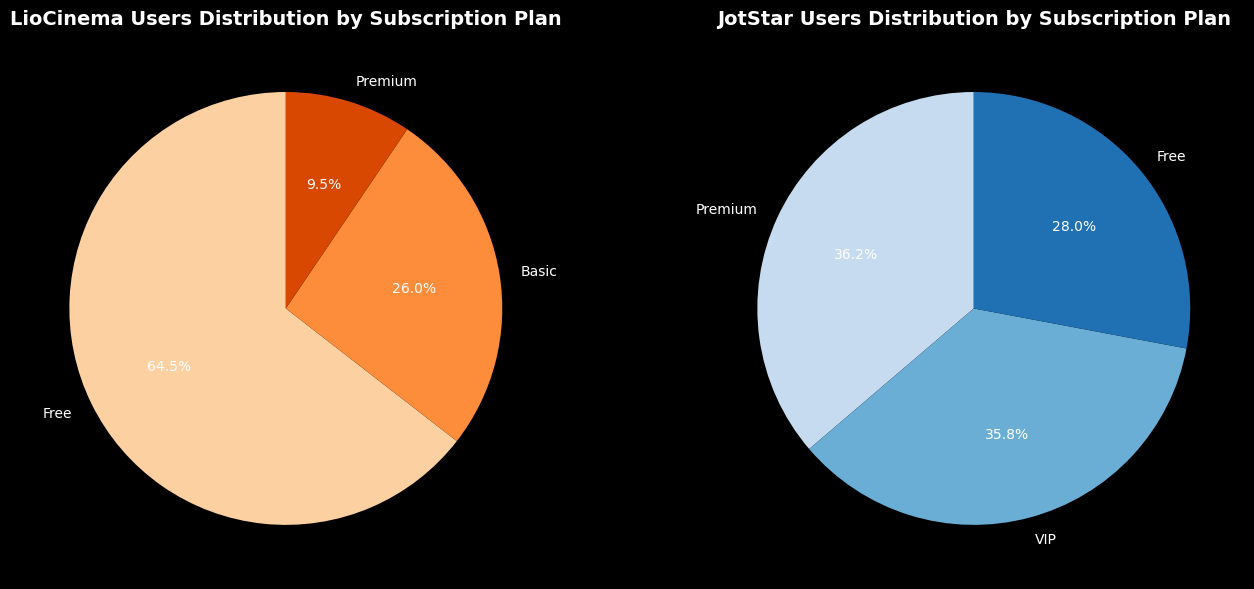

In [81]:
#considering the lastest subscription plan
jot_subscribers["current_subscription_plan"] = np.where(jot_subscribers["plan_change_date"].isna(),
                                                    jot_subscribers["subscription_plan"],  
                                                    jot_subscribers["new_subscription_plan"]  
                                                   )

lio_subscribers["current_subscription_plan"] = np.where(lio_subscribers["plan_change_date"].isna(),
                                                    lio_subscribers["subscription_plan"],  
                                                    lio_subscribers["new_subscription_plan"]  
                                                   )


plot_side_by_side(
    df1=lio_subscribers, df2=jot_subscribers, 
    plot_type="pie", y="current_subscription_plan", 
    palette1=lio_palette, palette2=jot_palette, 
    title1="LioCinema Users Distribution by Subscription Plan", 
    title2="JotStar Users Distribution by Subscription Plan"
)


<ul style="color:white; background-color:#444; padding:10px; border-radius:5px;">
  <p><b>LioCinema</b> has a higher share of <b>free users</b> (65%), while only 35% are paid subscribers. This suggests users prefer its <b>free content</b> or are <b>less willing to pay</b>.</p>
  <p>In contrast, <b>JotCinema</b> has a strong <b>paid subscriber base</b> (72%), with only 28% on free plans. This indicates that its <b>content drives users to pay</b> for access.</p>
</ul>


#  Key Comparisons

- LioCinema attracts a **younger audience** (18-24), while JotStar is more popular among **young adults** (25-34).  
- LioCinema dominates **Tier 3 cities** (43%), whereas JotCinema has a strong presence in **Tier 1 cities** (57%).  
- LioCinema has more **free users** (64%), while JotCinema drives more **paid subscriptions** (72%), indicating better monetization.  
- LioCinema has **3.4x more older users** (45+) compared to JotStar, though both platforms have a smaller share in this segment.  
- Both platforms have a **balanced reach** in Tier 2 cities, contributing **35%** to LioCinema and **30%** to JotCinema.  

# Conclusion  
**LioCinema** = **Younger Audience, Tier 3, More Free Users**  
**JotCinema** = **Young Adults, Tier 1, More Paid Users**  


#
<h2 style="color:orange; background-color:#2C3E50; padding:10px; border-radius:8px; text-decoration: underline;">
  4. Active vs. Inactive Users
</h2>

<p style="font-size: 16px; color: white; background-color:#34495E; padding:12px; border-radius:8px; line-height:1.5;">
  This section analyzes user engagement by identifying active and inactive users, exploring patterns of inactivity, and assessing potential factors contributing to churn and retention.
</p>


### Active User
##### A user who has logged in and engaged with the platform within a defined period (e.g., last 30 days). Engagement can include:
- Watching content
- Browsing shows/movies
- Liking or adding content to a watchlist
- Downloading content for offline viewing

### Inactive User
##### A user who has an account but has not engaged with the platform for a set period (e.g., no activity in the last 30-90 days). This includes:
- Users with a subscription but not watching content (dormant users)
- Free-tier users who haven't logged in recently
- Users whose trial has expired but haven’t subscribed 



In [86]:
# if last_activity_date is null then the user is active else inactive
lio_subscribers['user_activity'] = lio_subscribers['last_active_date'].apply(lambda x: 'Active' if pd.isna(x) else 'Inactive')
jot_subscribers['user_activity'] = jot_subscribers['last_active_date'].apply(lambda x: 'Active' if pd.isna(x) else 'Inactive')


## 

<h3 style="color:orange;">4.1 Percentage of active/inactive users for each platform </h3>


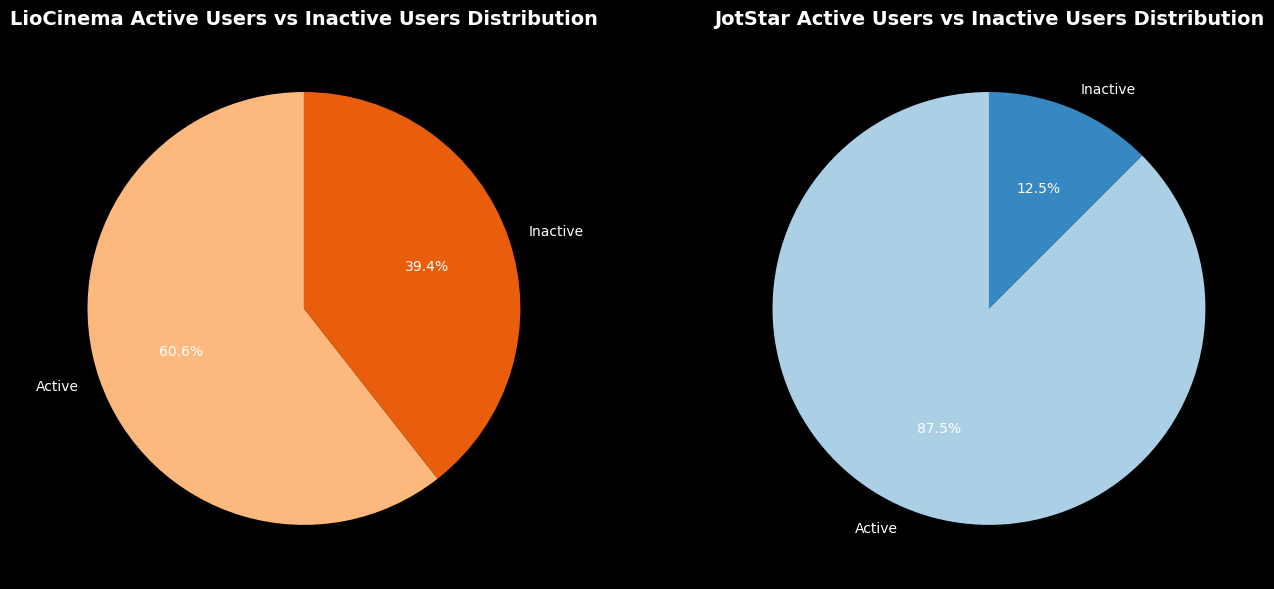

In [89]:
plot_side_by_side(
    df1=lio_subscribers, df2=jot_subscribers, 
    plot_type="pie", y="user_activity", 
    palette1=lio_palette, palette2=jot_palette, 
    title1="LioCinema Active Users vs Inactive Users Distribution", 
    title2="JotStar Active Users vs Inactive Users Distribution"
)


<div style="color:white; background-color:#444; padding:15px; border-radius:5px;">

<p><b>JotStar</b> has <b>88%</b> active subscribers, which is <b>27% higher</b> than <b>LioCinema</b> (61%).</p>
<p><b>JotStar</b>'s inactive subscribers are <b>13%</b>, which is <b>67% lower</b> than <b>LioCinema</b> (40%).</p>


##  


<h3 style="color:orange;">4.2 Active/Inactive rates across age groups  </h3>


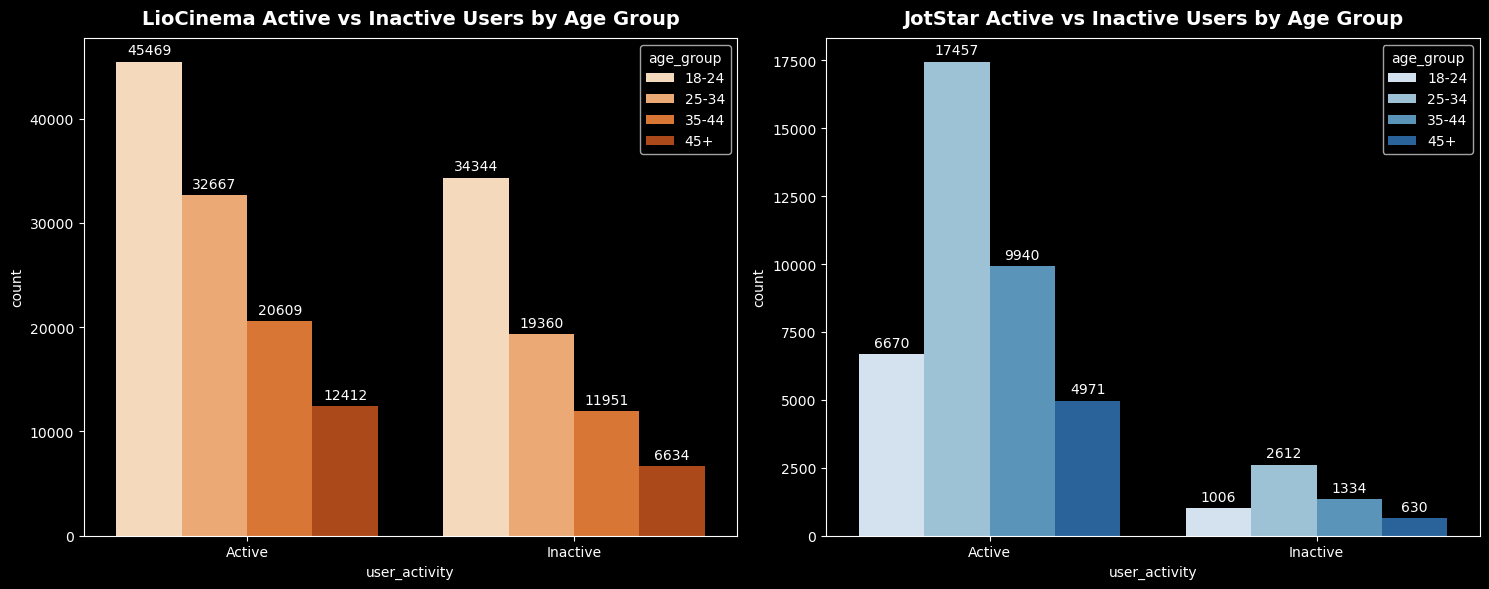

In [92]:
# Count Active & Inactive users by Age Group
lio_age = lio_subscribers.groupby(['user_activity', 'age_group'], observed=False).size().reset_index(name='count')
jot_age = jot_subscribers.groupby(['user_activity', 'age_group'], observed=False).size().reset_index(name='count')

# Function to plot side-by-side bar charts
def plot_bar(df1, df2, x, y, hue, title1, title2, palette1, palette2):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot for df1
    sns.barplot(data=df1, x=x, y=y, hue=hue, palette=palette1, ax=axes[0])
    axes[0].set_title(title1)
    
    # Add labels
    for container in axes[0].containers:
        axes[0].bar_label(container, fmt='%.0f', fontsize=10, padding=3)

    # Plot for df2
    sns.barplot(data=df2, x=x, y=y, hue=hue, palette=palette2, ax=axes[1])
    axes[1].set_title(title2)
    
    # Add labels
    for container in axes[1].containers:
        axes[1].bar_label(container, fmt='%.0f', fontsize=10, padding=3)

    plt.tight_layout()
    plt.show()


# Call function
plot_bar(
    df1=lio_age, df2=jot_age, 
    x="user_activity", y="count", hue="age_group",
    title1="LioCinema Active vs Inactive Users by Age Group",
    title2="JotStar Active vs Inactive Users by Age Group",
    palette1=lio_palette, palette2=jot_palette
)


<div style="color:white; background-color:#444; padding:15px; border-radius:5px;">

  <h3 style="color:white;">LioCinema Age Activity</h3>
  <ul>
    <li>The <b>18-24</b> age group has the <b>highest number</b> of <b>active</b> and <b>inactive users</b>, followed by <b>25-34</b>.</li>
    <li><b>A significant number</b> of users in the <b>35-44</b> and <b>45+</b> groups are <b>inactive</b>, which may indicate <b>content</b> or <b>engagement issues</b> for older users.</li>
    <li><b>LioCinema</b> is experiencing <b>rapid user growth</b>, but <b>sustaining engagement</b> needs <b>attention</b>.</li>
  </ul>

  <h3 style="color:white;">JotStar User Activity</h3>
  <ul>
    <li>The <b>25-34</b> age group <b>dominates active users</b>, indicating that this platform <b>appeals more</b> to <b>young adults</b>.</li>
    <li>The <b>18-24</b> group also has <b>strong engagement</b>, but its numbers are <b>lower</b> compared to <b>LioCinema</b>.</li>
    <li>The <b>majority of inactive users</b> are in the <b>35-44</b> and <b>45+</b> groups, but they are <b>significantly lower</b> than <b>LioCinema’s inactive numbers</b>.</li>
  </ul>

</div>


##  

<h3 style="color:orange;">4.3 Active & Inactive rates across Subscription Plans  </h3>


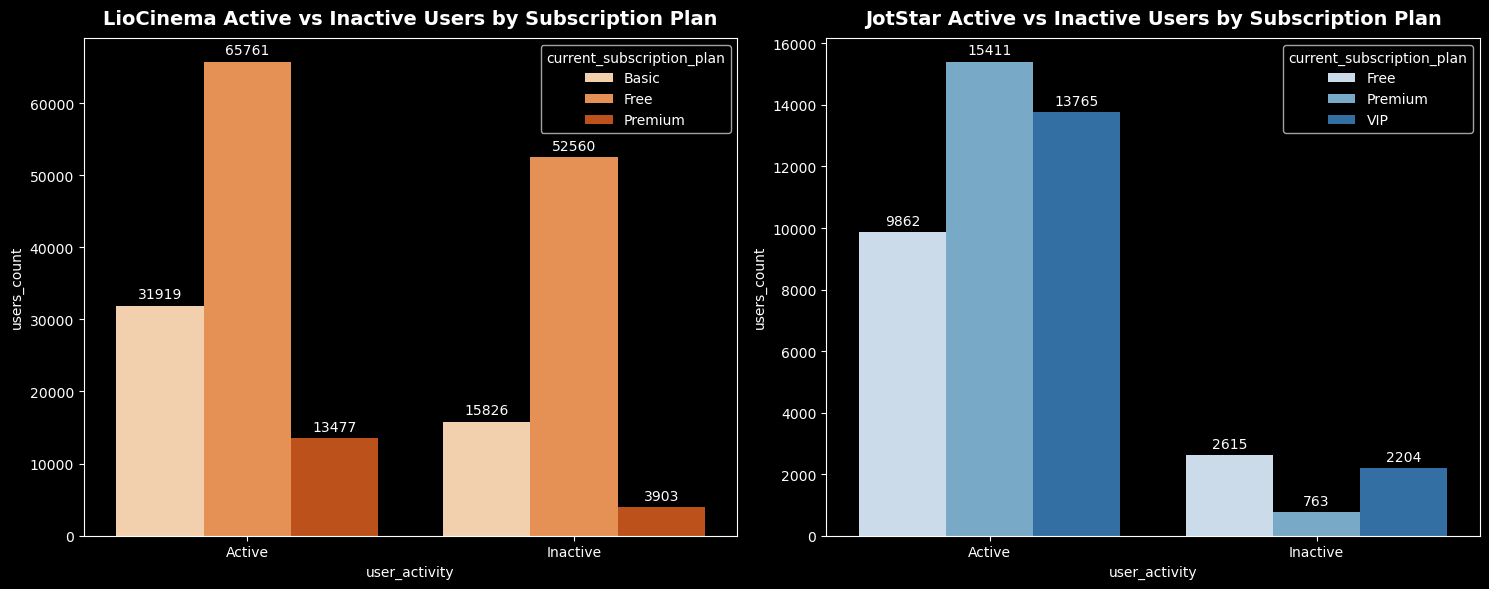

In [95]:
# Count Active & Inactive users by Age Group
lio_counts = lio_subscribers.groupby(['user_activity', 'current_subscription_plan']).size().reset_index(name='users_count')
jot_counts = jot_subscribers.groupby(['user_activity', 'current_subscription_plan']).size().reset_index(name='users_count')

# Call function
plot_bar(
    df1=lio_counts, df2=jot_counts, 
    x="user_activity", y="users_count", hue="current_subscription_plan",
    title1="LioCinema Active vs Inactive Users by Subscription Plan",
    title2="JotStar Active vs Inactive Users by Subscription Plan",
    palette1=lio_palette, palette2=jot_palette
)


<div style="color:white; background-color:#444; padding:15px; border-radius:5px;">

  <h3 style="color:white;">LioCinema Subscription Activity</h3>
  <ul>
    <li><b>Free plan users</b> has the highest number of both active(60k) and inactive (59.7k) users, suggesting a large but less engaged free user base.</b>.</li>
    <li><b>Premium users</b> shows strongest retention with 12k active and only 4.4k inactive users (27% inactive).</li>
    <li><b>Total active users:101k, Total inactive users:82k</li>
  </ul>

  <h3 style="color:white;">JotStar Subscription Activity</h3>
  <ul>
    <li><b>Premium tier</b> leads with 15k active users, and only 901 inactive (5.6% inactive).</li>
    <li><b>Free users</b> Free tier has 9.8k active and 2.6k inactive users (21% inactive rate).</li>
    <li><b>JotStar’s paid user base</b> is strong, but Free users might need <b>incentives to convert</b> to paid plans.</li>
  </ul>

</div>


### Key Comparisons  

- **JotStar** has **higher engagement** (88% active) than **LioCinema** (61%).  
- **LioCinema** struggles with **high inactivity** (39%), while JotStar keeps it low (13%).  
- **LioCinema attracts a #younger audience** (18-24), while **JotStar is more popular among #young adults** (25-34).  
- **LioCinema has #higher inactivity** in the **35-44 and 45+ age groups**, indicating **engagement challenges** for older users.  
- **JotStar's paid user base** is strong (Premium & VIP), while **LioCinema has more #free users** but struggles with retention.  

# Conclusion  
**LioCinema** = **Younger Audience, More Free Users, High Inactivity**  
**JotStar** = **Young Adults, Strong Paid User Base, Higher Engagement**  


#
<h2 style="color:orange; background-color:#2C3E50; padding:10px; border-radius:8px; text-decoration: underline;">
  5. Watch Time Analysis
</h2>

<p style="font-size: 16px; color: white; background-color:#34495E; padding:12px; border-radius:8px; line-height:1.5;">
  This section examines total watch time, user engagement patterns, peak viewing hours, and variations across different content types and devices.
</p>



<h3 style="color:orange;">5.1 Average watch time per user in each platform. </h3>


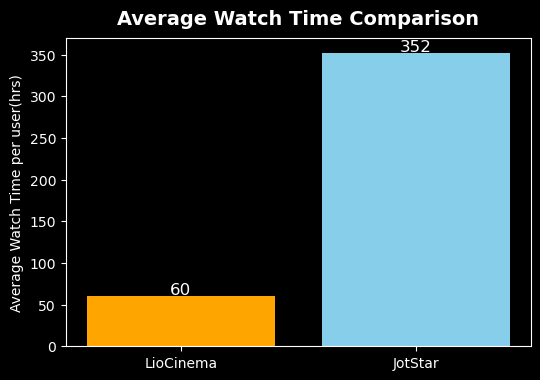

In [101]:
# calculate the avg watch time per user in hours
lio_avg_watch_time = round((lio_consumption['total_watch_time_mins'].sum()/lio_subscribers['user_id'].nunique())/60)
jot_avg_watch_time = round((jot_consumption['total_watch_time_mins'].sum()/jot_subscribers['user_id'].nunique())/60)


labels = ['LioCinema', 'JotStar']
watch_times = [lio_avg_watch_time, jot_avg_watch_time]

# Create bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, watch_times, color=['#FFA500', '#87CEEB'])

# Add labels and title
plt.ylabel('Average Watch Time per user(hrs)')
plt.title('Average Watch Time Comparison')

# Annotate values on top of bars
for i, v in enumerate(watch_times):
    plt.text(i, v + 2, str(v), ha='center', fontsize=12)

# Show plot
plt.show()


<div style="color:white; background-color:#444; padding:15px; border-radius:5px;">
  
  <p><b>LioCinema:</b> ~60 hrs</p>
  <p><b>JotStar:</b> ~352 hrs</p>
  
  <p> <b>JotStar users watch ~480% more</b> content than LioCinema users, indicating <b>higher engagement</b> and a <b>stronger content strategy</b>.</p>

</div>


## 


<h3 style="color:orange;">5.3 Watch time distribution across city tiers and device type</h3>


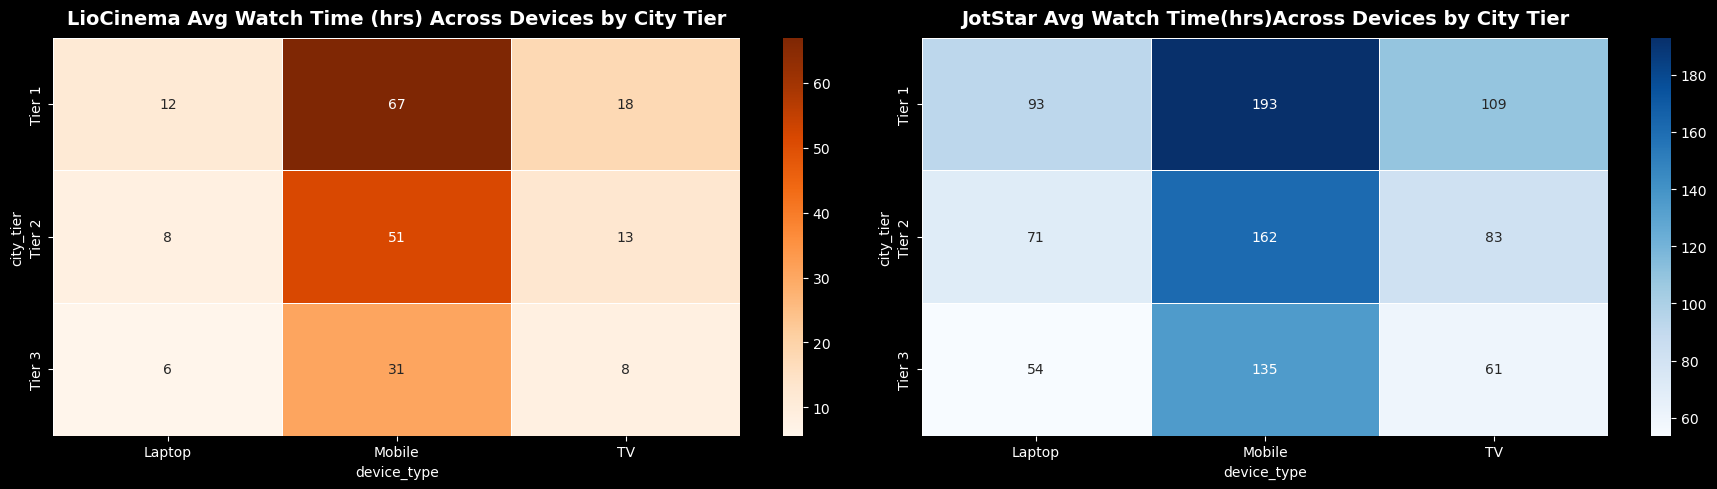

In [104]:
# Merge subscriber and consumption data
lio_user_merge = lio_subscribers.merge(lio_consumption, on='user_id', how='inner')
jot_user_merge = jot_subscribers.merge(jot_consumption, on='user_id', how='inner')

# Calculate average watch time per city tier and device type
lio_city_device_watch = lio_user_merge.groupby(['city_tier', 'device_type']).agg({'total_watch_time_mins': lambda x: x.mean()/60 }).rename(columns={'total_watch_time_mins': 'avg_watch_time_hrs_lio'})

jot_city_device_watch = jot_user_merge.groupby(['city_tier', 'device_type']).agg({'total_watch_time_mins': lambda x: x.mean()/60 }).rename(columns={'total_watch_time_mins': 'avg_watch_time_hrs_jot'})

# Merge Lio and Jot data
tier_watch_time = lio_city_device_watch.merge(jot_city_device_watch, on=['city_tier', 'device_type'], how='outer')

# Handle missing values
tier_watch_time.fillna(0, inplace=True)
tier_watch_time.reset_index(inplace=True)

# Pivot tables for heatmaps
jot_data = tier_watch_time.pivot(index='city_tier', columns='device_type', values='avg_watch_time_hrs_jot').fillna(0)
lio_data = tier_watch_time.pivot(index='city_tier', columns='device_type', values='avg_watch_time_hrs_lio').fillna(0)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Heatmap for LioCinema
sns.heatmap(lio_data, cmap="Oranges", annot=True, fmt=".0f", linewidths=0.5, ax=axes[0])
axes[0].set_title("LioCinema Avg Watch Time (hrs) Across Devices by City Tier")

# Heatmap for JotStar
sns.heatmap(jot_data, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5, ax=axes[1])
axes[1].set_title("JotStar Avg Watch Time(hrs)Across Devices by City Tier")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

<div style="color:white; background-color:#444; padding:15px; border-radius:5px;">
  
<p><b>LioCinema Watch Time Trends:</b></p>
<li>Mobile devices have the highest watch time across all city tiers.</liv>
<li>Tier 1 cities have the highest watch time on mobile (97 hours), followed by Tier 2 (71 hours) and Tier 3 (45 hours).</liv>
<li>Laptops and TVs have significantly lower watch times across all tiers, with minor variations.</liv>
<p> </p>
<p><b>JotStar Watch Time Trends:</b></p>
<li>Mobile devices again lead in watch time across all tiers, but at much higher values compared to LioCinema.</liv>
<li>Watch time on mobile is highest in Tier 1 cities (193 hours) and gradually decreases in Tier 2 (162 hours) and Tier 3 (135 hours).</liv>


#
<h3 style="color:orange;">6.4 Total Users Engagement across each platform </h3>


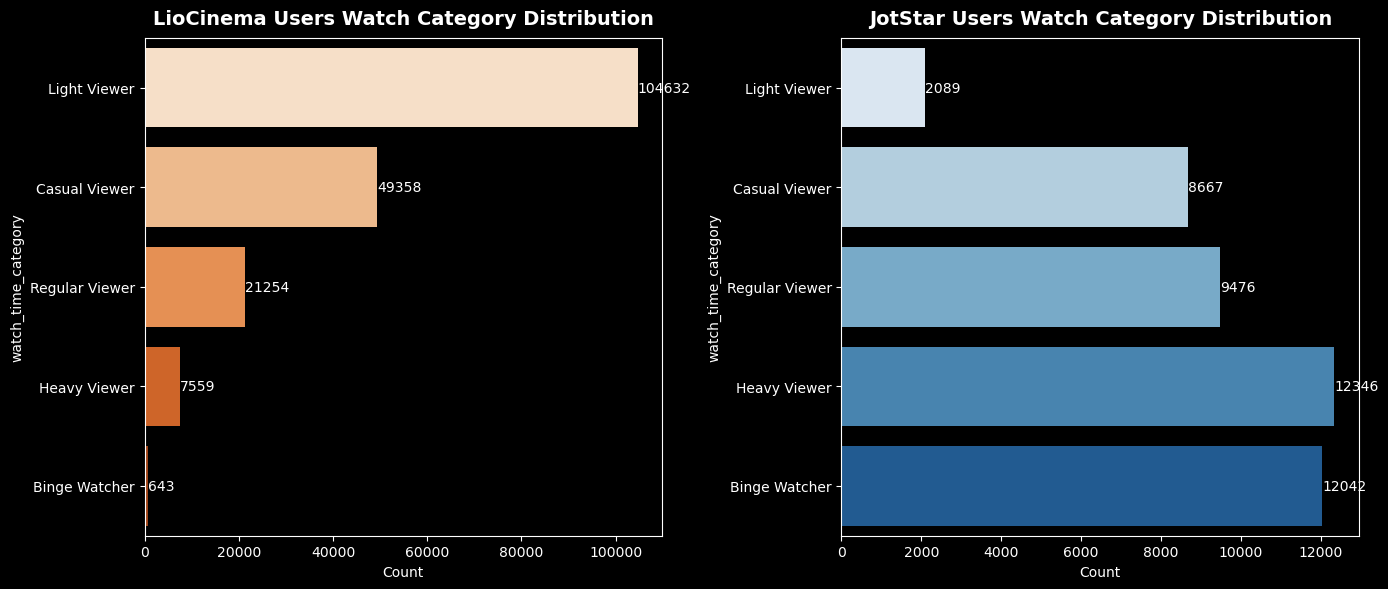

In [239]:
bins = [0, 2000, 7000, 15000, 30000, float('inf')]
labels = ['Light Viewer', 'Casual Viewer', 'Regular Viewer', 'Heavy Viewer', 'Binge Watcher']

# Aggregate watch time per user, selecting the first occurrence of user_activity
lio_time_categories = lio_user_merge.groupby('user_id').agg(
    total_watch_time_mins=('total_watch_time_mins', 'sum'),
    user_activity=('user_activity', 'first')  
).reset_index()

jot_time_categories = jot_user_merge.groupby('user_id').agg(
    total_watch_time_mins=('total_watch_time_mins', 'sum'),
    user_activity=('user_activity', 'first') 
).reset_index()



# Assign watch time category
lio_time_categories['watch_time_category'] = pd.cut(lio_time_categories['total_watch_time_mins'], bins=bins, labels=labels, right=False) 
jot_time_categories['watch_time_category'] = pd.cut(jot_time_categories['total_watch_time_mins'], bins=bins, labels=labels, right=False)


# Plot comparison
plot_side_by_side(
    df1=lio_time_categories, df2=jot_time_categories, 
    plot_type="count", y="watch_time_category", 
    palette1=lio_palette, palette2=jot_palette, 
    title1="LioCinema Users Watch Category Distribution", 
    title2="JotStar Users Watch Category Distribution"
)

<div style="color:white; background-color:#444; padding:15px; border-radius:5px;">
  
<p><b>LioCinema Watch Time Distribution:</b></p>
<li>The majority of users (84%) fall into the "light viewers" and "Casual Viewer" categories, indicating low engagement levels.</li>
<li>Higher engagement tiers account for just ~5% of the user base, suggesting limited long-duration viewing.</li>
<li>The Binge watchers segment is almost negligible, highlighting minimal binge-watching behavior.</li>

<p> </p>
<p><b>JotStar Watch Time Distribution:</b></p>
<li>Engagement is more balanced, with a substantial portion of users distributed across "Regular viewers," "Heavy Viewer," and "Binge watchers" categories.</li>
<li>Over 45% of users fall into the "Heavy Viewer" tier or higher, reflecting stronger retention and longer watch durations.</li>
<li>The "Binge watchers" category has nearly <b>20 times more users</b> than LioCinema, indicating a significantly higher level of sustained engagement and binge-watching behavior.</li>

</div>


# **Key Comparisons**  

##  **Overall Watch Time and retention**  
- JotStar excels in engagement, with significantly higher watch time and better user retention.
- **LioCinema struggles with user retention**, especially for long viewing sessions.

##  **Device Preference**  
- Both platforms are **mobile-first**, but JotStar dominates, with nearly **3x** the watch time on mobile.
- Laptops & TVs see moderate engagement for JotStar, while LioCinema has minimal watch time on these devices.  

## **City Tier Performance**  
- JotStar maintains steady engagement across all city tiers, while LioCinema experiences a sharp drop-off in Tier 2 and Tier 3 cities.
  
## **Watch Time Distribution**  
- LioCinema’s audience prefers shorter sessions, with 85% of users in the "Light" & "Casual" categories.
- JotStar retains users better, with 45% in the "Heavy" or higher categories, leading to longer watch sessions.
- Binge-watching is 20x stronger on JotStar.
  
# **Conclusion**  
 **LioCinema** = **Short Viewing Sessions, Mobile-Dependent, Weak on Large Screens & Lower Tiers**  
**JotStar** = **Higher Engagement, Stronger Retention, Better Binge-Watching Behavior**  

# 
<h2 style="color:orange; background-color:#2C3E50; padding:10px; border-radius:8px; text-decoration: underline;">
  6. Inactivity Correlation
</h2>

<p style="font-size: 16px; color: white; background-color:#34495E; padding:12px; border-radius:8px; line-height:1.5;">
  This section explores factors contributing to user inactivity, analyzing correlations between last activity date, watch time, subscription status, and content engagement.
</p>


## 
<h3 style="color:orange;">6.1 Correlation between inactivity and total watch time</h3>


In [112]:
import pandas as pd
from scipy.stats import chi2_contingency

def inactivity_correlation(df):
    # Create contingency table with "All" row/column
    contingency_table = pd.crosstab(df['watch_time_category'], df['user_activity'], margins=True)

    # Perform Chi-Square test (excluding the "All" row and column)
    chi2, p, dof, expected = chi2_contingency(contingency_table.iloc[:-1, :-1])  

    # Check statistical significance
    significance = "significant" if p < 0.05 else "not significant"
    print(f"There is a {significance} association between watch time category and user activity. (p-value: {p:.5f})")

    # Calculate Inactive Percentage per watch_time_category
    contingency_table['Inactive_percentage'] = (
        (contingency_table['Inactive'] / contingency_table['All']) * 100
    ).round(0)

    return chi2, p, contingency_table


In [113]:
print(" LioCinema Inactive User Stats:")
print("-" * 50)

lio_chi2, lio_p, lio_contingency_table = inactivity_correlation(lio_time_categories)

print(f" Statistical Significance (Chi-Square) = {lio_chi2:.2f}")
print(f" P-value = {lio_p:.6f}")  
print("\n Inactivity Stats (Contingency Table):")
print(lio_contingency_table)


 LioCinema Inactive User Stats:
--------------------------------------------------
There is a significant association between watch time category and user activity. (p-value: 0.00000)
 Statistical Significance (Chi-Square) = 42280.52
 P-value = 0.000000

 Inactivity Stats (Contingency Table):
user_activity        Active  Inactive     All  Inactive_percentage
watch_time_category                                               
Light Viewer          42494     62138  104632                 59.0
Casual Viewer         40394      8964   49358                 18.0
Regular Viewer        20244      1010   21254                  5.0
Heavy Viewer           7387       172    7559                  2.0
Binge Watcher           638         5     643                  1.0
All                  111157     72289  183446                 39.0


<div style="color:white; background-color:#444; padding:15px; border-radius:5px;">
<p>- Stronger engagement = Higher retention (p-value: 0.0).</p>
<p>- Light (59%) & Casual Viewers (18%) show the highest inactivity, indicating short sessions fail to retain users.</p>
<p>- Regular (5%), Heavy (2%), & Binge Watchers (1%) have low inactivity, showing strong engagement boosts retention.</p>
<p>- Overall LioCinema has 39% inactivity is driven by low-viewership users, highlighting the need for better engagement strategies.</p>

In [115]:
print(" JotStar Inactive User Stats:")
print("-" * 50)

jot_chi2, jot_p, jot_contingency_table = inactivity_correlation(jot_time_categories)

print(f" Statistical Significance (Chi-Square) = {jot_chi2:.2f}")
print(f" P-value = {jot_p:.6f}")  
print("\n Inactivity Stats (Contingency Table):")
print(jot_contingency_table)


 JotStar Inactive User Stats:
--------------------------------------------------
There is a significant association between watch time category and user activity. (p-value: 0.00000)
 Statistical Significance (Chi-Square) = 10839.09
 P-value = 0.000000

 Inactivity Stats (Contingency Table):
user_activity        Active  Inactive    All  Inactive_percentage
watch_time_category                                              
Light Viewer            667      1422   2089                 68.0
Casual Viewer          6059      2608   8667                 30.0
Regular Viewer         8431      1045   9476                 11.0
Heavy Viewer          11896       450  12346                  4.0
Binge Watcher         11985        57  12042                  0.0
All                   39038      5582  44620                 13.0


<div style="color:white; background-color:#444; padding:15px; border-radius:5px;">
<p>- Stronger engagement = Higher retention (p-value: 0.0).</p>
<p>- Light (68%) & Casual Viewers (30%) have the highest inactivity, indicating weak engagement among short-session users.</p>
<p>- Regular (11%), Heavy (4%), & Binge Watchers (0%) show strong retention, with minimal inactivity in high watch-time users.</p>
<p>- Overall Jotstar inactivity at 13% is significantly lower, suggesting better engagement and user retention than LioCinema..</p>

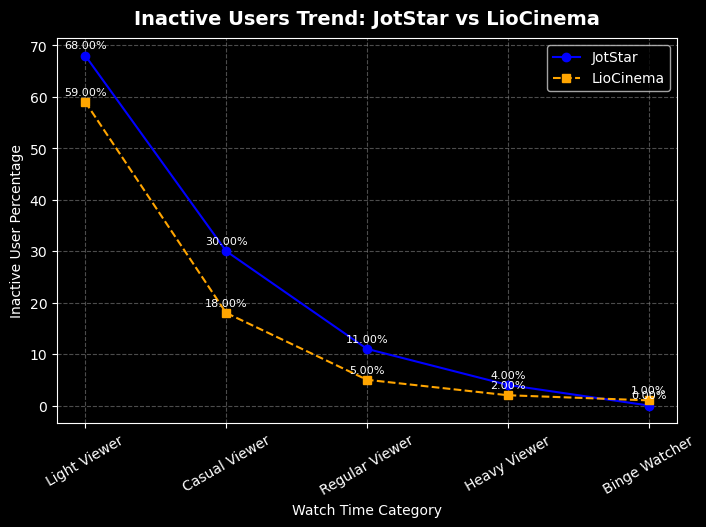

In [117]:
categories = lio_contingency_table.index[:-1]

# Extract inactive percentages
jot_inactive = jot_contingency_table.loc[categories, 'Inactive_percentage']
lio_inactive = lio_contingency_table.loc[categories, 'Inactive_percentage']

# Plot line chart
plt.figure(figsize=(8, 5))
plt.plot(categories, jot_inactive, 'o-', label="JotStar", color='b')
plt.plot(categories, lio_inactive, 's--', label="LioCinema", color='#FFA500')

# Add data labels for JotStar
for x, y in zip(categories, jot_inactive):
    plt.annotate(f'{y:.2f}%', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='white')

# Add data labels for LioCinema
for x, y in zip(categories, lio_inactive):
    plt.annotate(f'{y:.2f}%', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='white')

# Formatting
plt.xlabel("Watch Time Category")
plt.ylabel("Inactive User Percentage")
plt.title("Inactive Users Trend: JotStar vs LioCinema")
plt.xticks(rotation=30)  # Rotate for better readability
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#  Key Comparisons: 

##  Lower Watch Time → Higher Inactivity
- LioCinema: 59% of Light Viewers are inactive, showing weak engagement.
- JotStar: 68% inactivity in Light Viewers, indicating an even steeper drop-off..

##  Higher Watch Time → Lower Inactivity
- LioCinema: Inactivity drops from 59% (Light) to 1% (Binge Watchers).
- JotStar: A sharper decline, from 68% (Light) to 0% (Binge Watchers).


#  Conclusion
- As watch time increases, inactivity declines significantly for both platforms.
- JotStar retains high watch-time users better, reinforcing stronger content engagement.
  
-  **LioCinema** = *High Inactivity, Low Retention, Needs Better Engagement Strategies*
-  **JotStar** = *Higher Engagement, Stronger Retention, Balanced Watch Time Distribution*


# 
<h2 style="color:orange; background-color:#2C3E50; padding:10px; border-radius:5px;">
  7. Downgrade Trends
</h2>

<p style="font-size: 16px; color: white; background-color:#34495E; padding:12px; border-radius:8px; line-height:1.5;">
  Downgrade trends in OTT platforms refer to users shifting to lower-tier subscriptions or reducing their engagement, 
  often influenced by pricing, content availability, or competitive alternatives.
</p>


In [120]:
lio_subscribers.head(2)

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan,current_subscription_plan,user_activity
0,UIDLC00000bea68a,25-34,Tier 3,2024-10-24,Free,NaT,NaT,None,Free,Active
1,UIDLC00009202848,18-24,Tier 1,2024-09-18,Basic,NaT,NaT,None,Basic,Active


In [121]:
def get_subscription_change(df, plan):
    return np.select(
        [df['current_subscription_plan'].map(plan) > df['subscription_plan'].map(plan),
         df['current_subscription_plan'].map(plan) < df['subscription_plan'].map(plan)],
        ['Upgraded', 'Downgraded'],
        default='No Change'
    )

#ranking the lio plans
lio_plan_rank = {'Free':0,
                 'Basic':1,
                 'Premium':2
                }

#ranking jot plans
jot_plan_rank = {'Free':0,
                 'VIP':1,
                 'Premium':2
                 }


#assigning the function to lioCinema and Jotstar
lio_subscribers['subscription_change'] = get_subscription_change(lio_subscribers, lio_plan_rank)
jot_subscribers['subscription_change'] = get_subscription_change(jot_subscribers, jot_plan_rank)



lio_subscribers.head(2)

,user_id,age_group,city_tier,subscription_date,subscription_plan,last_active_date,plan_change_date,new_subscription_plan,current_subscription_plan,user_activity,subscription_change
0,UIDLC00000bea68a,25-34,Tier 3,2024-10-24,Free,NaT,NaT,None,Free,Active,No Change
1,UIDLC00009202848,18-24,Tier 1,2024-09-18,Basic,NaT,NaT,None,Basic,Active,No Change


In [122]:
def plan_change(df, upgraded_downgraded):
    #until_november = pd.to_datetime(datetime(2024, 11, 30))
    # Filter for users based on the change type (Upgraded/Downgraded)
    plan_changes = df[(df['subscription_change'] == upgraded_downgraded)].reset_index(drop=True)

    # Count total unique users who upgraded/downgraded
    total_changes = plan_changes['user_id'].nunique()
    
    if total_changes == 0:
        return f"No {upgraded_downgraded.lower()} detected."

    # Group by original and new subscription plan
    change_counts = (plan_changes
                     .groupby(['subscription_plan', 'current_subscription_plan'])['user_id']
                     .nunique()
                     .reset_index()
                     .rename(columns={'user_id': 'change_count'}))  
    
    # Calculate percentage of plan changes
    change_counts['percentage_of_changes'] = ((change_counts['change_count'] / df['user_id'].nunique()) * 100).round(2)
    overall_change_percentage = round((total_changes / df['user_id'].nunique()) * 100, 2)
    
    return overall_change_percentage, change_counts


In [123]:
lio_downgrade_pct, lio_downgrade_stats = plan_change(lio_subscribers,"Downgraded")
print("Percentage of LioCinema Users downgraded their current plan = ",lio_downgrade_pct)
print()
lio_downgrade_stats

Percentage of LioCinema Users downgraded their current plan =  9.75



,subscription_plan,current_subscription_plan,change_count,percentage_of_changes
0,Basic,Free,8769,4.78
1,Premium,Basic,2677,1.46
2,Premium,Free,6439,3.51


In [124]:
jot_downgrade_pct, jot_downgrade_stats = plan_change(jot_subscribers,"Downgraded")
print("Percentage of JotStar Users downgraded their current plan = ",jot_downgrade_pct)
print()
jot_downgrade_stats

Percentage of JotStar Users downgraded their current plan =  4.68



,subscription_plan,current_subscription_plan,change_count,percentage_of_changes
0,Premium,Free,165,0.37
1,Premium,VIP,284,0.64
2,VIP,Free,1641,3.68


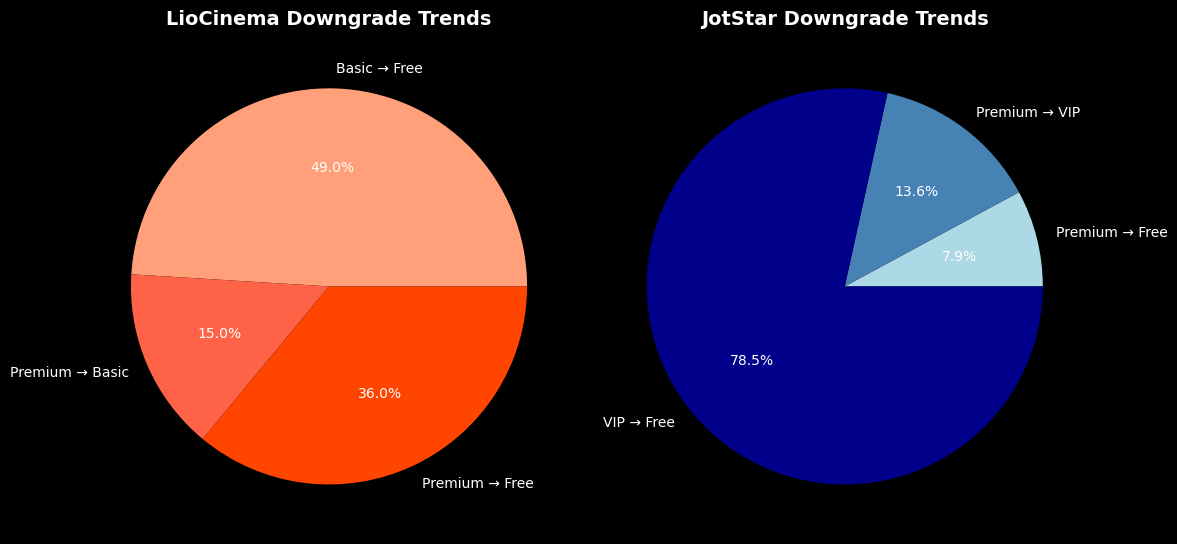

In [125]:
lio_colors = ['#FFA07A', '#FF6347', '#FF4500']  
jot_colors = ['#ADD8E6', '#4682B4', '#00008B']

# subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# LioCinema Pie Chart
axes[0].pie(lio_downgrade_stats["percentage_of_changes"], 
            labels=lio_downgrade_stats["subscription_plan"] + " → " + lio_downgrade_stats["current_subscription_plan"], 
            autopct='%1.1f%%', colors=lio_colors)
axes[0].set_title("LioCinema Downgrade Trends")

# JotStar Pie Chart 
axes[1].pie(jot_downgrade_stats["percentage_of_changes"], 
            labels=jot_downgrade_stats["subscription_plan"] + " → " + jot_downgrade_stats["current_subscription_plan"], 
            autopct='%1.1f%%', colors=jot_colors)
axes[1].set_title("JotStar Downgrade Trends")


plt.tight_layout()
plt.show()


#  Key Comparison - Plan Downgrade Trend: 

## Overall Downgrade Rate  
- **LioCinema**: 🔻 **9.75%** of users downgraded their plan.  
- **JotStar**: 🔻 Only **4.68%** downgraded—**2.15x lower** than LioCinema.  

 **JotStar retains users better**, while LioCinema faces **higher downgrade churn**.  

##  Premium Plan Stability  
- **LioCinema**: 36% of Premium downgrades go directly to Free, leading to a major revenue loss.
- **JotStar**: Only 7.9% of Premium users downgrade to Free—4.5x lower than LioCinema

**LioCinema struggles to retain Premium users, while JotStar maintains stronger subscriber loyalty.** 

#  Conclusion  
- **LioCinema** = *High Downgrade Rate, Struggles to Retain Premium Users, Major Drop in Basic Plan Users*  
- **JotStar** = *Lower Downgrade Rate, Stronger Premium Retention, VIP Plan Needs Improvement*  


# 
<h2 style="color:orange; background-color:#2C3E50; padding:10px; border-radius:8px; text-decoration: underline;">
  8. Upgrade Patterns
</h2>

<p style="font-size: 16px; color: white; background-color:#34495E; padding:12px; border-radius:8px; line-height:1.5;">
  This section analyzes user upgrade trends, highlighting factors influencing subscribers to switch to higher-tier plans, premium content engagement, and growth in platform revenue.
</p>


In [128]:
lio_upgrade_pct, lio_upgrade_stats = plan_change(lio_subscribers,"Upgraded")
print("Percentage of LioCinema Users upgraded their current plan = ",lio_upgrade_pct)
print()
lio_upgrade_stats

Percentage of LioCinema Users upgraded their current plan =  1.53



,subscription_plan,current_subscription_plan,change_count,percentage_of_changes
0,Basic,Premium,924,0.50
1,Free,Basic,1399,0.76
2,Free,Premium,480,0.26


In [129]:
jot_upgrade_pct, jot_upgrade_stats = plan_change(jot_subscribers,"Upgraded")
print("Percentage of JotStar Users upgraded their current plan = ",jot_upgrade_pct)
print()
jot_upgrade_stats

Percentage of JotStar Users upgraded their current plan =  9.06



,subscription_plan,current_subscription_plan,change_count,percentage_of_changes
0,Free,Premium,637,1.43
1,Free,VIP,788,1.77
2,VIP,Premium,2619,5.87


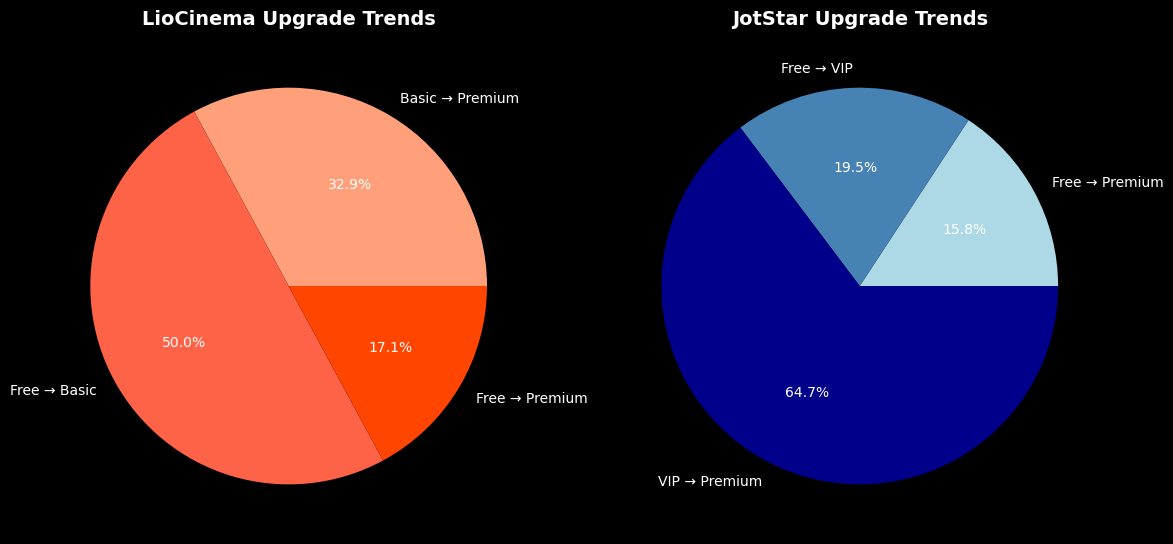

In [130]:
lio_colors = ['#FFA07A', '#FF6347', '#FF4500']  
jot_colors = ['#ADD8E6', '#4682B4', '#00008B']

# subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# LioCinema Pie Chart
axes[0].pie(lio_upgrade_stats["percentage_of_changes"], 
            labels=lio_upgrade_stats["subscription_plan"] + " → " + lio_upgrade_stats["current_subscription_plan"], 
            autopct='%1.1f%%', colors=lio_colors)
axes[0].set_title("LioCinema Upgrade Trends")

# JotStar Pie Chart 
axes[1].pie(jot_upgrade_stats["percentage_of_changes"], 
            labels=jot_upgrade_stats["subscription_plan"] + " → " + jot_upgrade_stats["current_subscription_plan"], 
            autopct='%1.1f%%', colors=jot_colors)
axes[1].set_title("JotStar Upgrade Trends")


plt.tight_layout()
plt.show()


#  Key Comparison - Plan Upgrade Trend:  

##  Overall Upgrade Rate  
- **LioCinema**: 🔼**1.53%** of users upgraded their plan.  
- **JotStar**: 🔼**9.06%** upgraded—**~6x higher** than LioCinema.  

**JotStar drives significantly more upgrades, while LioCinema struggles with conversions.**.  

##  Premium Plan Growth  
- **LioCinema**: **50%** of users moved from low plan to Premium.
- **JotStar**: **80%** of users moved from low plan to Preium. 

#  Conclusion  
- **LioCinema** = *Low Upgrade Rate, Gradual Plan Progression, Weak Premium Adoption*  
- **JotStar** = *Higher Upgrade Rate, Strong Premium Conversions, Better Retention of Paid Users*  


# 

<h2 style="color:orange; background-color:#2C3E50; padding:10px; border-radius:8px; text-decoration: underline;">
  9. Paid Users Distribution
</h2>

<p style="font-size: 16px; color: white; background-color:#34495E; padding:12px; border-radius:8px; line-height:1.5;">
  This section analyzes the distribution of paid users across different subscription tiers (<b>Basic, Premium</b> for <b>LioCinema</b> and <b>VIP, Premium</b> for <b>JotStar</b>). 
  The analysis focuses on the proportion of premium users in <b>Tier 1, Tier 2, and Tier 3</b> cities, highlighting key trends and differences between platforms.
</p>


## 
<h3 style="color:orange;">9.1 Paid Users Distribution across Platforms</h3>


In [134]:
lio_active_paid_users = lio_subscribers[lio_subscribers["current_subscription_plan"] !="Free"].reset_index(drop=True)
jot_active_paid_users = jot_subscribers[jot_subscribers["current_subscription_plan"] !="Free"].reset_index(drop=True)

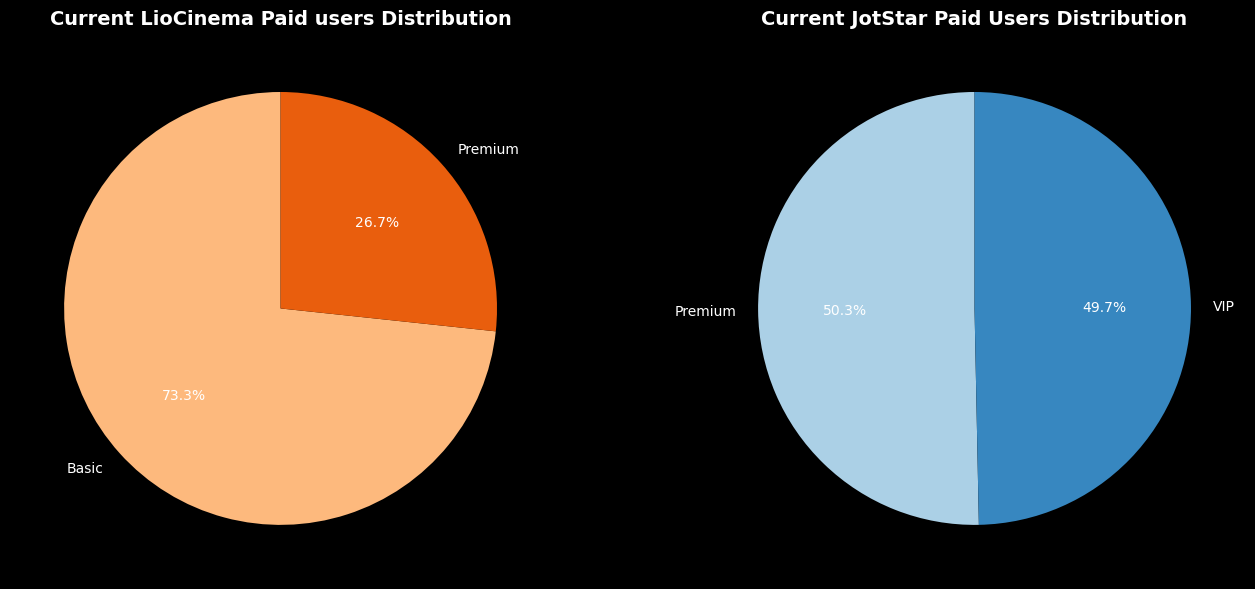

In [135]:
plot_side_by_side(
    df1=lio_active_paid_users, df2=jot_active_paid_users, 
    plot_type="pie", y="current_subscription_plan", 
    palette1=lio_palette, palette2=jot_palette, 
    title1="Current LioCinema Paid users Distribution", 
    title2="Current JotStar Paid Users Distribution"
)


<div style="color:white; background-color:#444; padding:15px; border-radius:5px;">

- **JotStar** has a **balanced premium subscriber base**, with **50.3% Premium and 49.7% VIP users**, indicating **strong user willingness to pay for higher-tier plans**.  
- **LioCinema**, on the other hand, has a **high reliance on Basic plans (73%)**, suggesting **lower monetization potential and price sensitivity among users**.  

</div>

## 
<h3 style="color:orange;">9.2 Premium Users Distribution across Cities</h3>


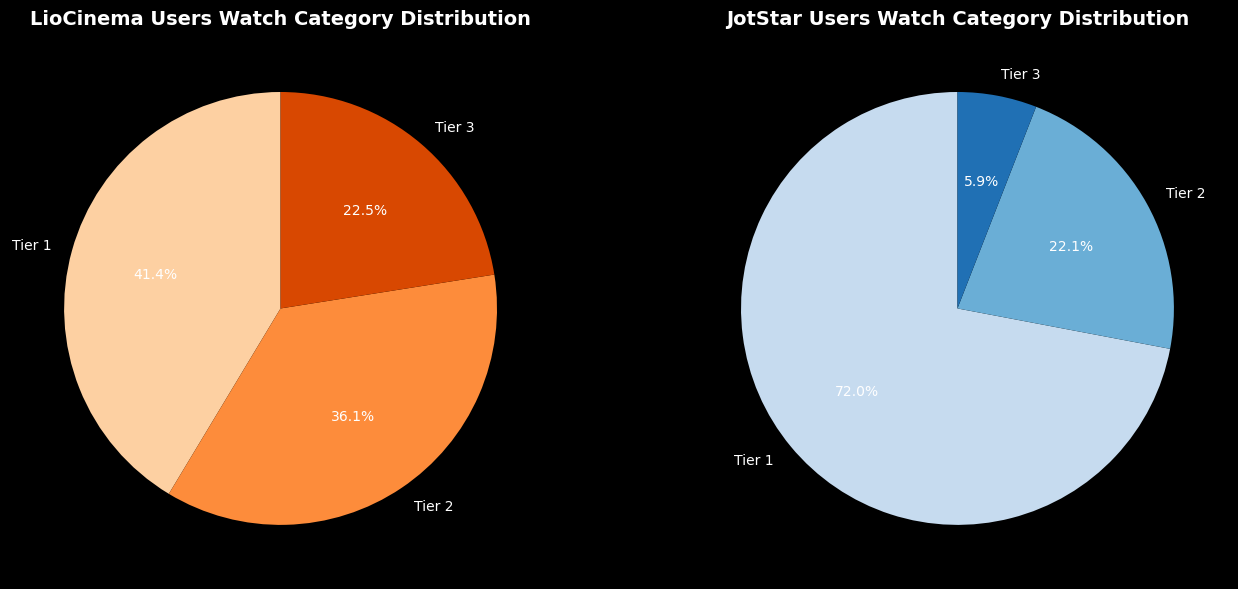

In [229]:
# Premium plan only
lio_premium_users = lio_active_paid_users[lio_active_paid_users['current_subscription_plan'] == 'Premium']
jot_premium_users = jot_active_paid_users[jot_active_paid_users['current_subscription_plan'] == 'Premium']

# Plot comparison
plot_side_by_side(
    df1=lio_premium_users, df2=jot_premium_users, 
    plot_type="pie", y="city_tier", 
    palette1=lio_palette, palette2=jot_palette, 
    title1="LioCinema Premium users across City-Tier", 
    title2="Jotstar Premium users across City-Tier"
)

<div style="color:white; background-color:#444; padding:15px; border-radius:5px;">

- **LioCinema** has a **strong Premium user base**,in **all city Tier** with Tier-1 domination(41%).
- **JotStar dominates in Tier 1 (72%)**, with **high Premium users**, showing **strong monetization potential**. However, **Premium adoption drops sharply in lower-tier cities**.  

</div>


# Key Comparison  

## Paid Subscriber Distribution  
- **LioCinema**: Majority of paid users are on **Basic plans (73.9%)**, with **low Premium adoption** across all city tiers.  
- **JotStar**: A **balanced distribution** between **Premium (51.7%) and VIP (48.3%)**, indicating **strong demand for higher-tier plans**.  

## City-Tier Insights  
- **LioCinema’s Basic plan dominates Tier 2 (18,279 users)**, suggesting **price-sensitive users** and **low willingness to upgrade**.  
- **JotStar sees strong Premium adoption in Tier 1 (11,419 users)**, highlighting **better monetization potential**.  

## Premium Plan Growth  
- LioCinema’s Premium plan adoption is well adopted across all the cities.  
- Jotstar Premium plan is majorly focused in Tier-1.  

**JotStar’s structured pricing strategy drives better conversions, while LioCinema struggles with premium adoption.**  

# Conclusion  
- **LioCinema** = *Basic Plan Dominance, Price-Sensitive Users, Low Premium Growth*  
- **JotStar** = *Balanced Premium & VIP Users, Strong City-Tier Monetization, Better Conversion Strategy*  


#
<h2 style="color:orange; background-color:#2C3E50; padding:10px; border-radius:8px; text-decoration: underline;">
  11. Revenue Analysis
</h2>


### Revenue Calculation Assumptions:

#### Core Issue : 
If a user's last active date falls in mid-September:- 
- Should they still be charged for the full month of October?
- Are they considered a paying subscriber in October and November?
  
## Possible Scenarios and Decisions:

#### 1. Subscription Cancellation Upon Inactivity:
- If subscriptions are automatically canceled after a set period of inactivity (e.g., 30 days), revenue for October and November should not be counted.
- In this case, the last_active_date would be a key factor in revenue calculations.
  
#### 2. Subscription Continues Despite Inactivity:
- If users are charged regardless of inactivity, revenue should be counted for October and November.
- This is the assumption currently in use.
  
#### 3. Data Limitations:
- We do not have data indicating when users cancel their subscriptions.
- Therefore, we assume that any user with an active subscription during the given time period remains a paying customer.

#### Conclusion
Due to the lack of cancellation data, we will continue calculating revenue under the assumption that subscriptions remain active, even if a user is inactive.

In [143]:
# Pricing dictionary
prices = {
    "LioCinema": {"Free": 0, "Basic": 69, "Premium": 129},
    "Jotstar": {"Free": 0, "VIP": 159, "Premium": 359},
}

In [144]:
def calculate_platform_revenue(subscriber_df, platform_name, prices):
    """
    Calculates the total revenue for a given platform, optimizing for performance using NumPy and vectorization.
    """
    end_date = pd.to_datetime(datetime(2024, 11, 30))

    subscriber_df = subscriber_df.copy().reset_index(drop=True)
    subscriber_df['subscription_date'] = pd.to_datetime(subscriber_df['subscription_date'])
    subscriber_df['plan_change_date'] = pd.to_datetime(subscriber_df['plan_change_date'])

    plan_change = ~subscriber_df['plan_change_date'].isnull()

    days_subscribed = (end_date - subscriber_df['subscription_date']).dt.days + 1

    initial_days = np.where(plan_change, (subscriber_df['plan_change_date'] - subscriber_df['subscription_date']).dt.days + 1, days_subscribed)
    new_days = np.where(plan_change, (end_date - subscriber_df['plan_change_date']).dt.days, 0)

    plan_prices = {(platform_name, plan): price for plan, price in prices[platform_name].items()}

    initial_plan_prices = subscriber_df['subscription_plan'].map(lambda plan: plan_prices.get((platform_name, plan), 0))
    new_plan_prices = subscriber_df['new_subscription_plan'].map(lambda plan: plan_prices.get((platform_name, plan), 0)).fillna(0)

    # Calculate revenue with vectorized operations
    subscriber_df['revenue'] = (initial_plan_prices / 30) * initial_days + (new_plan_prices / 30) * new_days

    return round(subscriber_df['revenue'].sum() / 1_000_000, 2)

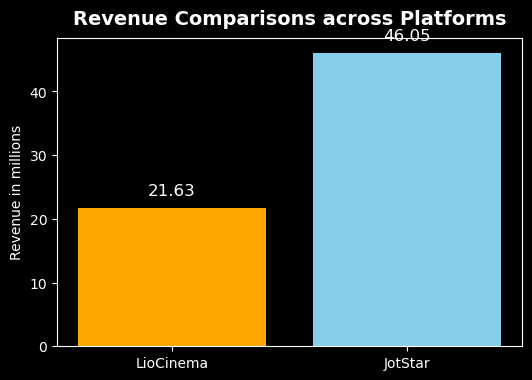

In [145]:
lio_revenue = calculate_platform_revenue(lio_subscribers, "LioCinema",prices)
jotstar_revenue = calculate_platform_revenue(jot_subscribers, "Jotstar",prices)


labels = ['LioCinema', 'JotStar']
platform_revenue = [lio_revenue, jotstar_revenue]

# Create bar chart
plt.figure(figsize=(6, 4))
plt.bar(labels, platform_revenue, color=['#FFA500', '#87CEEB'])

# Add labels and title
plt.ylabel('Revenue in millions')
plt.title('Revenue Comparisons across Platforms')

# Annotate values on top of bars
for i, v in enumerate(platform_revenue):
    plt.text(i, v + 2, str(v), ha='center', fontsize=12)

plt.show()


# Key Comparison  

## Revenue Performance  
- **LioCinema**: **₹21.65M** in total revenue, reflecting **heavy reliance on Basic plans** and **limited premium adoption**.  
- **JotStar**: **₹46M** in total revenue—**2.1x higher than LioCinema**, driven by **strong Premium & VIP conversions**.  

## Monetization Efficiency  
- **LioCinema’s revenue growth is constrained** by its **low-tier subscriber base**, limiting high-value customer acquisition.  
- **JotStar maximizes revenue potential** with **a well-structured upgrade path**, leading to **higher premium adoption and ARPU (Average Revenue Per User)**.  

# Conclusion  
- **LioCinema** = *Lower Revenue, Heavy Basic Plan Dependence, Weak Premium Upsell*  
- **JotStar** = *Higher Revenue, Strong Premium & VIP Growth, Effective Monetization Strategy*  


#
#
<h2 style="color:orange; background-color:#2C3E50; padding:10px; border-radius:8px; text-decoration: underline;">
LioCinema vs. Jotstar: Strengths, Weaknesses & Merger Potential
</h2>

#### The Indian OTT market is witnessing a fierce battle between LioCinema and Jotstar. While LioCinema dominates in subscriber count, Jotstar leads in engagement and revenue. A merger could create a 211k+ user powerhouse with a stronger engagement model and higher monetization.



# **LioCinema**

## **Strengths**
- **Large Subscriber Base:**  
  - **183.5k users** capturing **80.4%** of the total **228k** subscribers.
  - **4.11x larger** than Jotstar, showing strong market dominance.
    
- **Rapid Growth:**  
  - **Exponential subscriber growth** indicates strong market momentum.
    
- **Regional Focus:**  
  - Content in **Hindi, English,** and **South Indian languages**.
  - Dominates **Tier 3 cities** with **42.6%** of its viewership.
    
- **Youth Appeal:**  
  - Popular among the **18-24 age group**.

## **Weaknesses**
- **Low Engagement:**  
  - Only **57.3%** of users are active, with **42.7%** showing inactivity.
  - **Lower watch time** on larger screens (TVs & laptops).
    
- **Monetization Challenges:**  
  - **60% free users** with heavy reliance on **Basic plans (73.9%)**.
  - **High downgrade rate of 18.47%**, with **36%** of Premium users downgrading to Free.
    
- **Limited Content Variety:**  
  - Focus primarily on **movies**, lacking diversity in series or sports.
    
- **Low Upgrade Rate:**  
  - Only **2.9%** of users upgrade their plan.

---

# **Jotstar**

## **Strengths**
- **High Engagement:**  
  - **87% active users** with only **13%** inactive.
  - **Higher watch time** across devices: **2.5x** on mobile, **+694%** on laptops, **+276%** on TVs.
    
- **Diverse Content:**  
  - Offers a balanced mix of **movies, series,** and **sports**.
  - Broader language coverage including **Bengali, Gujarati,** and **Punjabi**.
  - Strong presence in **Tier 1 cities (57.2%)**.
    
- **Effective Monetization:**  
  - A balanced paid user base: **51.7% Premium** and **48.3% VIP** subscribers.
  - **Low downgrade rate (5.65%)** and a robust **upgrade rate of 10.93%**.
    
- **Better Revenue Performance:**  
  - Generates **₹45.15 Cr** in total revenue, significantly higher than LioCinema.

## **Weaknesses**
- **Smaller Audience:**  
  - **44.6k subscribers**, which is only **19.6%** of the total market share.
    
- **Geographical Concentration:**  
  - Mainly popular in **Tier 1 cities**, which may limit reach in other regions.
    
- **VIP Plan Vulnerability:**  
  - Some VIP users tend to downgrade, indicating potential **value perception challenges**.

---

# **What If They Merge?**

- **Combined Audience Reach:**  
  - Merge **LioCinema's 183.5k users** (youthful, regional) with **Jotstar's 44.6k engaged subscribers**.
    
- **Richer Content Library:**  
  - Blend LioCinema’s **movie focus** with Jotstar’s **series and sports offerings** for a more diverse lineup.
    
- **Enhanced Monetization:**  
  - Leverage **Jotstar’s strong upgrade rate (10.93%)** to convert LioCinema’s **60% free users** into premium subscribers.
    
- **Wider Device Appeal:**  
  - Utilize Jotstar’s **superior performance on laptops and TVs** to boost LioCinema’s **engagement on larger screens**.

---

In summary, **LioCinema** boasts a **large, rapidly growing user base** with strong **regional and youth appeal**, but it struggles with **engagement** and **premium monetization**. Meanwhile, **Jotstar** benefits from **high engagement, diverse content,** and effective **monetization strategies**, despite a **smaller overall audience**. A merger could combine these strengths to create a **more balanced** and **competitive streaming service**.
